In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# A. SUPPORT2 Dataset Overview
## General Information

*   **Dataset Link**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/880/support2)
*   **Dataset Creator**: Professor Frank Harrel,
 Department of Biostatistics, Vanderbilt University.

## Purpose of the Dataset
To create and test a model that predicts 180-day survival for seriously ill hospitalized adults (Phase I of SUPPORT) and compare its accuracy with an existing system and doctors' own predictions (Phase II of SUPPORT).


## Additional Dataset Info
*   **Funding**: Robert Wood Johnson Foundation
*   **Data Sensitivity**: Includes information about race, gender, income, and education level of patients.
*   **Data Sources**: Medical records, personal interviews, and the National Death Index (NDI). For each patient administrative records data, clinical data and survey data were collected.
*   **Introductory Paper**: [A controlled trial to improve care for seriously ill hospitalized patients. The study to understand prognoses and preferences for outcomes and risks of treatments (SUPPORT)](https://pubmed.ncbi.nlm.nih.gov/7474243/)










# B. Importing Data Set and Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# upload csv file
from google.colab import files
uploaded = files.upload()

Saving support2-1.csv to support2-1.csv


In [ ]:
df = pd.read_csv(r"/content/support2-1.csv")

# C. IDA - Exploring and Cleaning Data Set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

**Checking and formating the data types**

   
*  Change the data type for 'age' column to integer number.
*   Round the columns with decimal numbers to two decimal places
*   Change the format for 'surv2m, surv6m, prg2m, and prg6m' columns. Since they represent the percentile, rename the column titles and present the percentage of them for better understanding of the values.





In [ ]:
df.dtypes

,0
ID,int64
age,float64
death,int64
sex,object
hospdead,int64
slos,int64
d.time,int64
dzgroup,object
dzclass,object
num.co,int64


In [ ]:
df['age'] = df['age'].astype(int)

In [ ]:
#roundup the charges, totcst, totmcst columns to 2 decimal points
cost = ['charges', 'totcst', 'totmcst']

for i in cost:
    df[i] = df[i].round(2)

In [ ]:
# Changing format for the columns below. First rename the columns, then multiplying them by 100 to show suitable percentages.
percentage = ['surv2m', 'surv6m', 'prg2m', 'prg6m']

df.rename(columns={col: f'percentage_{col}' for col in percentage}, inplace=True)

for col in percentage:
    df[f'percentage_{col}'] = (df[f'percentage_{col}'] * 100).round(1)

In [ ]:
# Checking duplicates
df.duplicated().sum()

0

# D. Exploratory Data Analysis

This part focuses on missing values, outliers, descriptive statics and research questions.

For further exploratory analysis 4 key indicators were investigated in the dataset. These indicators were analyzed to understand their significance. Among these indicators several research questions were created to have insight from the data set. Extra cleaning fatures were applied based on the research areas.

Key Indicators

1. Patient Demographics
2. Disease Related Trends
3. Mortality/Survival Factors and Correlations
4. Medical Expenditure

**D.1. Checking missing values and outliers**

In [ ]:

def calculate_missing_values(df):
    # Count of missing values
    missing_count = (df.isnull().sum() + (df == '').sum())

    # Percentage of missing values
    missing_percentage = ((missing_count / len(df)) * 100).round(2)

    # Checking for potential outliers for numerical columns only
    numerical_df = df.select_dtypes(include=['number'])  # Filter for numerical columns
    Q1 = numerical_df.quantile(0.25)
    Q3 = numerical_df.quantile(0.75)
    IQR = Q3 - Q1
    outlier_counts = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).sum()

    # Creating a DataFrame for the results
    summary_df = pd.DataFrame({
        "Missing": missing_count,
        "% Missing": missing_percentage,
        "Outliers": outlier_counts})

    # Percentage of outliers
    summary_df['% Outliers'] = summary_df['Outliers'] / len(df) * 100
    summary_df['% Outliers'] = summary_df['% Outliers'].round(2)

    # Print the combined table
    print(summary_df)

# Call the function
calculate_missing_values(df)


                   Missing  % Missing  Outliers  % Outliers
ID                       0       0.00       0.0        0.00
adlp                  5641      61.95     149.0        1.64
adls                  2867      31.49       0.0        0.00
adlsc                    0       0.00       0.0        0.00
age                      0       0.00      57.0        0.63
alb                   3372      37.03      15.0        0.16
aps                      1       0.01     178.0        1.95
avtisst                 82       0.90      43.0        0.47
bili                  2601      28.57     926.0       10.17
bun                   4352      47.80     267.0        2.93
ca                       0       0.00       NaN         NaN
charges                172       1.89     912.0       10.02
crea                    67       0.74     987.0       10.84
d.time                   0       0.00     267.0        2.93
death                    0       0.00       0.0        0.00
dementia                 0       0.00   

**D.2. Handling Missing Values and Outliers**



**a. Imputing Missing Values based on the Recommended Values**

  According to the [HBiostat Repository](https://hbiostat.org/data/repo/supportdesc) , it has been recommended to handle the missing values on the Physiological marker columns such as alb, pafi, bili, crea, bun, wblc and urine by imputing them using normal fill in values.


**Baseline Variable   | Normal Fill-in Value**

Serum albumin          - 3.5

PaO2/FiO2 ratio        - 333.3

Bilirubin              - 1.01

Creatinine             - 1.01

BUN                    - 6.5

White blood count      - 9(thousands)

Urine output           - 2502



In [ ]:
# Imputing missing values based on the recommended normal fill in values.
df['alb']   = df['alb'].fillna(value=3.5)
df['pafi']  = df['pafi'].fillna(value=333.3)
df['bili']  = df['bili'].fillna(value=1.01)
df['crea']  = df['crea'].fillna(value=1.01)
df['bun']   = df['bun'].fillna(value=6.5)
df['wblc']  = df['wblc'].fillna(value=9)
df['urine'] = df['urine'].fillna(value=2502)

**b. Removing Scoma = 0 row**

According to the Glasgow Scale the score ranges from 3(deep coma) to 15 (fully alert). Therefore, having a coma score = 0, can be an error. Eliminating this row gets rid of some singular missing values of the columns such as meanbp, sod, etc.


**c. Imputing Missing Values and Detecting outliers for 'edu, income, charges, totcst and totmcst' Columns**


*   Distribution of these columns is shown below to make a decision for imputing missing value.

*   Since 'edu' column has a normal distribution, the mean is a better choice to imput for missing values. On the other hand, 'income, charges, totcst and totmcst' columns have skewed data, the median is a better choice to imput for missing values.



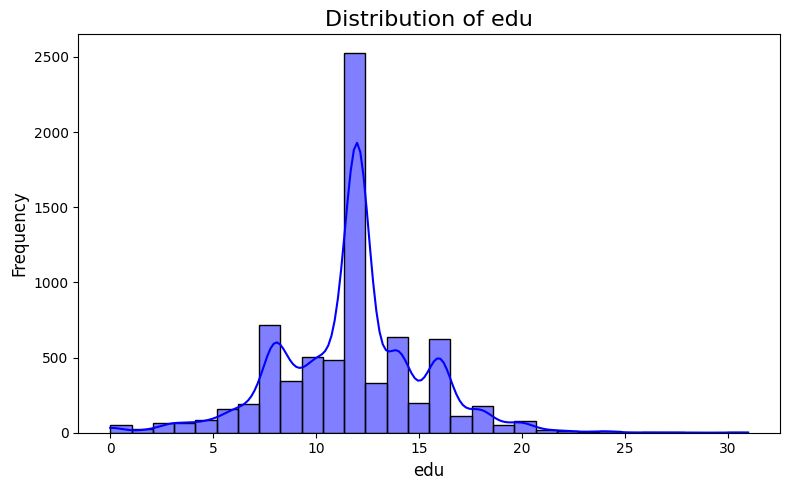

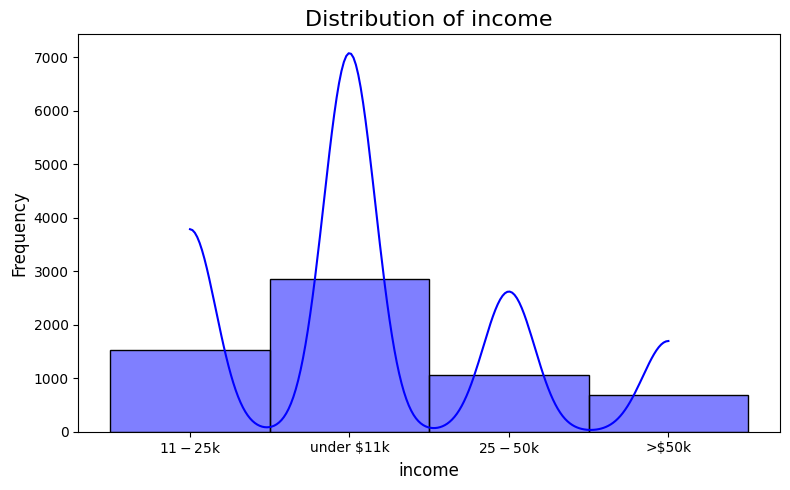

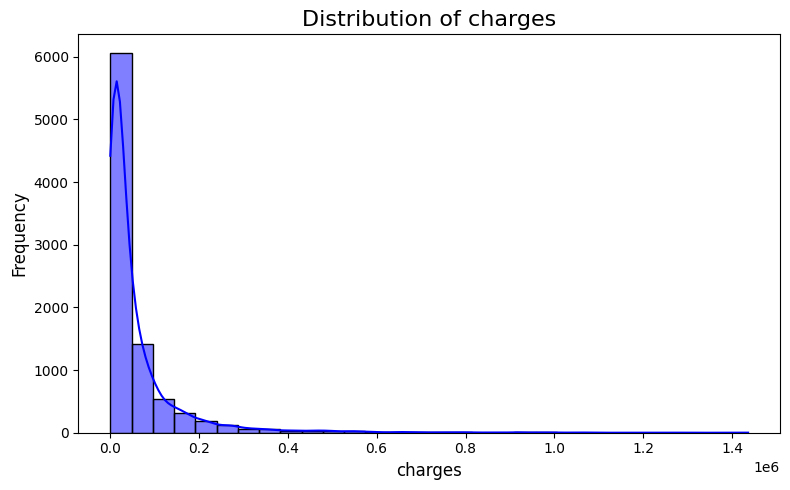

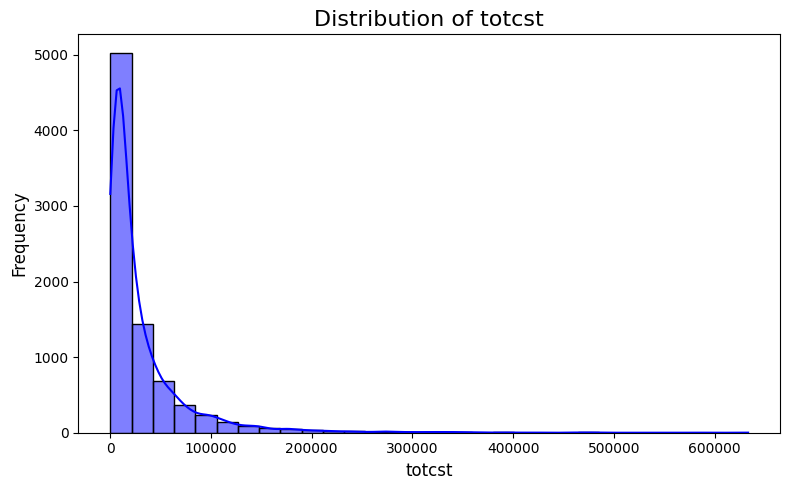

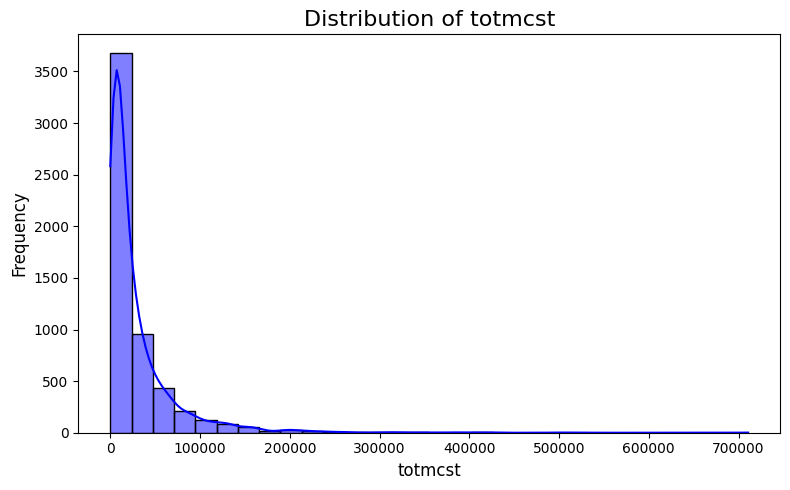

In [ ]:
columns = ['edu', 'income', 'charges', 'totcst', 'totmcst']

for col in columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
# Fill missing values for 'edu' with its mean
df['edu'] = df['edu'].fillna(df['edu'].mean())

# Fill missing values for the other columns with their medians
columns_to_fill_with_median = ['charges', 'totcst', 'totmcst']
for col in columns_to_fill_with_median:
    df[col] = df[col].fillna(df[col].median())


**D.3. Handling Outliers**

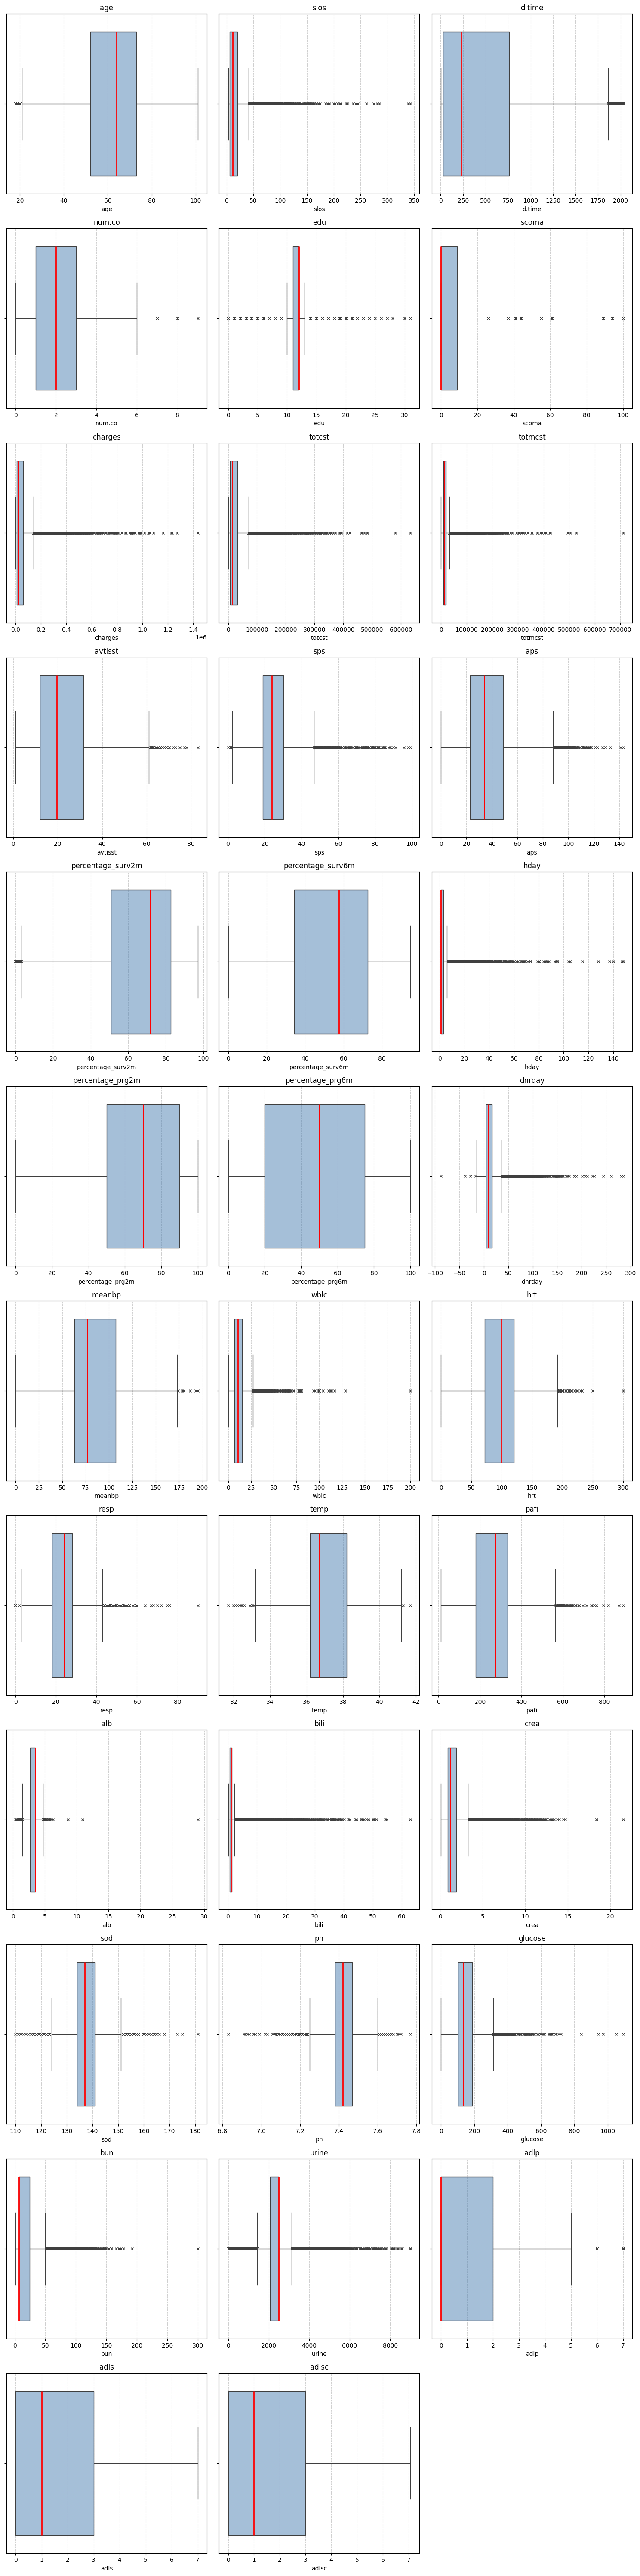

In [ ]:
# Checking Outliers


# Selecting only the numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Dropping the 'ID' column if it exists
if 'ID' in numeric_df.columns:
    numeric_df = numeric_df.drop('ID', axis=1)

# Filtering out columns where the maximum value is 1 or less (Exclude columns having only 1s and 0s)
numeric_df = numeric_df.loc[:, numeric_df.max() > 1]

# Determining the number of rows and columns for subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(numeric_df.columns) + n_cols - 1) // n_cols  # Calculate rows based on total columns

# Creating the subplots
plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust overall figure size
for i, column in enumerate(numeric_df.columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Place each plot in the grid
    sns.boxplot(
        x=numeric_df[column],
        flierprops={"marker": "x", "markersize": 5},  # Customise outlier marker
        boxprops={"facecolor": (.3, .5, .7, .5)},  # Set box color and transparency
        medianprops={"color": "r", "linewidth": 2}  # Customise the median line
    )
    plt.title(column, fontsize=12)  # Add titles with consistent font size
    plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# 'charges' column has a few negative values,
# it would be better to remove them and replace them with the median.
df.loc[df['totmcst'] < 0, 'totmcst'] = np.nan
df['totmcst'] = df['totmcst'].fillna(df['totmcst'].median())

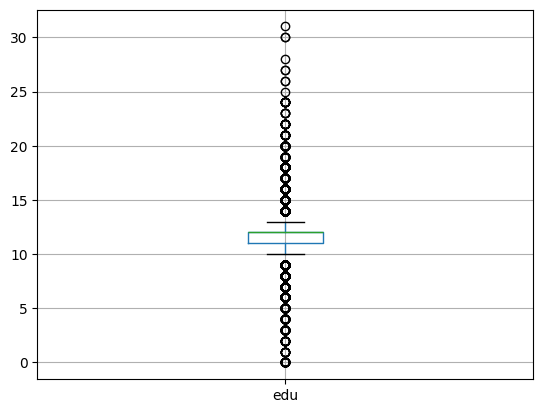

In [ ]:
# 'edu' column has 25+ years for the education level.
# Based on the researches and the outliers of the 'edu' column,
# imputing 25 year would be better for the upper level.
df[['edu']].boxplot()
df.loc[df['edu'] > 25, 'edu'] = 25


**D.4. Descriptive Analysis**

In [ ]:
# Applying descriptive analysis
pd.set_option('display.max_columns', None)
df.describe().round(2)

,ID,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,percentage_surv2m,percentage_surv6m,hday,diabetes,dementia,percentage_prg2m,percentage_prg6m,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.00,9105.00,9105.00,9105.00,9105.00,9105.00,9105.00,9105.00,9104.00,9105.00,9105.00,9105.00,9023.00,9104.00,9104.0,9104.00,9104.00,9105.00,9105.0,9105.00,7456.00,7472.00,9075.00,9104.00,9105.00,9104.00,9104.00,9104.00,9105.00,9105.00,9105.00,9105.00,9104.00,6821.00,4605.00,9105.00,9105.00,3464.00,6238.00,9105.00
mean,4553.00,62.15,0.68,0.26,17.86,478.45,1.87,11.74,12.06,59335.15,29229.01,22875.87,22.61,25.53,37.6,63.59,52.01,4.40,0.2,0.03,61.88,49.97,14.58,84.55,12.27,97.16,23.33,37.10,263.47,3.15,2.11,1.77,137.57,7.42,159.87,19.99,2357.33,1.16,1.64,1.89
std,2628.53,15.60,0.47,0.44,22.01,560.38,1.34,3.11,24.64,101785.91,43761.29,35113.75,13.23,9.90,19.9,24.82,25.34,9.13,0.4,0.18,29.84,30.44,19.94,27.69,9.17,31.56,9.57,1.25,103.09,0.74,4.55,1.68,6.03,0.08,88.39,23.27,1005.36,1.74,2.23,2.00
min,1.00,18.00,0.00,0.00,3.00,3.00,0.00,0.00,0.00,1169.00,0.00,0.00,1.00,0.20,0.0,0.00,0.00,1.00,0.0,0.00,0.00,0.00,-88.00,0.00,0.00,0.00,0.00,31.70,12.00,0.40,0.10,0.10,110.00,6.83,0.00,1.00,0.00,0.00,0.00,0.00
25%,2277.00,52.00,0.00,0.00,6.00,26.00,1.00,11.00,0.00,9941.00,6571.65,9371.73,12.00,19.00,23.0,50.78,34.30,1.00,0.0,0.00,50.00,20.00,4.00,63.00,7.00,72.00,18.00,36.20,180.00,2.70,0.60,0.90,134.00,7.38,103.00,6.50,2075.00,0.00,0.00,0.00
50%,4553.00,64.00,1.00,0.00,11.00,233.00,2.00,12.00,0.00,25024.00,14452.73,13223.50,19.50,23.90,34.0,71.60,57.50,1.00,0.0,0.00,70.00,50.00,9.00,77.00,10.40,100.00,24.00,36.70,276.19,3.50,1.01,1.20,137.00,7.42,135.00,6.50,2502.00,0.00,1.00,1.00
75%,6829.00,73.00,1.00,1.00,20.00,761.00,3.00,12.00,9.00,63531.00,32445.14,19144.83,31.67,30.20,49.0,82.60,72.60,3.00,0.0,0.00,90.00,75.00,17.00,107.00,15.10,120.00,28.00,38.20,333.30,3.50,1.30,1.90,141.00,7.47,188.00,24.00,2502.00,2.00,3.00,3.00
max,9105.00,101.00,1.00,1.00,343.00,2029.00,9.00,25.00,100.00,1435423.00,633212.00,710682.00,83.00,99.19,143.0,97.00,94.80,148.00,1.0,1.00,100.00,100.00,285.00,195.00,200.00,300.00,90.00,41.70,890.38,29.00,63.00,21.50,181.00,7.77,1092.00,300.00,9000.00,7.00,7.00,7.07


**D.5. Correlation Analysis**

  
**a. Change all the categorical columns to numerical columns**


In [ ]:
df_corr = df.copy()
df_corr["sex"] = df_corr["sex"].apply(lambda x: 2 if "female" in x else 1)
df_corr["sex"].value_counts()

,count
sex,
1,5125
2,3980


In [ ]:
def replace_values_dz_group(df, column):
    def replace_value(x):
        if x == "Cirrhosis":
            return 8
        elif x == "Colon Cancer":
            return 7
        elif x == "Coma":
            return 6
        elif x == "MOSF w/Malig":
            return 5
        elif x == "Lung Cancer":
            return 4
        elif x == "COPD":
            return 3
        elif x == "CHF":
            return 2
        else:
            return 1

    df[column] = df[column].apply(replace_value)
    return df

df_corr = replace_values_dz_group(df_corr, "dzgroup")
df_corr["dzgroup"].value_counts()

,count
dzgroup,
1,3515
2,1387
3,967
4,908
5,712
6,596
7,512
8,508


In [ ]:
def replace_values_dz_class(df, column):
    def replace_value(x):
        if x == "Coma":
            return 4
        elif x == "Cancer":
            return 3
        elif x == "COPD/CHF/Cirrhosis":
            return 2
        elif x == "ARF/MOSF":
            return 1
        else:
            return np.nan

    df[column] = df[column].apply(replace_value)
    return df

df_corr = replace_values_dz_class(df_corr, "dzclass")
df_corr["dzclass"].value_counts()

,count
dzclass,
1,4227
2,2862
3,1420
4,596


In [ ]:
def replace_values_race(df, column):
    def replace_value(x):
        if x == "asian":
            return 5
        elif x == "other":
            return 4
        elif x == "hispanic":
            return 3
        elif x == "black":
            return 2
        elif x == "white":
            return 1
        else:
            return np.nan

    df[column] = df[column].apply(replace_value)
    return df

df_corr = replace_values_race(df_corr, "race")
df_corr["race"].value_counts()

,count
race,
1.0,7191
2.0,1391
3.0,290
4.0,112
5.0,79


In [ ]:
def replace_values_dnr(df, column):
    def replace_value(x):
        if x == "dnr before sadm":
            return 3
        elif x == "dnr after sadm":
            return 2
        elif x == "no dnr":
            return 1
        else:
            return np.nan

    df[column] = df[column].apply(replace_value)
    return df

df_corr = replace_values_dnr(df_corr, "dnr")

df_corr["dnr"].value_counts()

,count
dnr,
1.0,5880
2.0,2956
3.0,239


In [ ]:
def replace_values_ca(df, column):
    def replace_value(x):
        if x == "yes":
            return 3
        elif x == "metastatic":
            return 2
        elif x == "no":
            return 1
        else:
            return np.nan

    df[column] = df[column].apply(replace_value)
    return df

df_corr = replace_values_ca(df_corr, "ca")
df_corr["ca"].value_counts()

,count
ca,
1,5995
2,1858
3,1252


In [ ]:
def replace_values_sfdm2(df, column):
    def replace_value(x):
        if x == "Coma or Intub":
            return 5
        elif x == "SIP>=30":
            return 4
        elif x == "adl>=4 (>=5 if sur)":
            return 3
        elif x == "no(M2 and SIP pres)":
            return 2
        elif x == "<2 mo. follow-up":
            return 1
        else:
            return np.nan

    df[column] = df[column].apply(replace_value)
    return df

df_corr = replace_values_sfdm2(df_corr, "sfdm2")

df_corr["sfdm2"].value_counts()

,count
sfdm2,
1.0,3123
2.0,3061
3.0,916
4.0,564
5.0,41


In [ ]:
def replace_values_income(df, column):
    def replace_value(x):
        if x == ">$50k":
            return 4
        elif x == "$25-$50k":
            return 3
        elif x == "$11-$25k":
            return 2
        elif x == "<2 mo. follow-up":
            return 1
        else:
            return np.nan

    df[column] = df[column].apply(replace_value)
    return df

df_corr = replace_values_income(df_corr, "income")

df_corr["income"].value_counts()

,count
income,
2.0,1527
3.0,1057
4.0,684


In [ ]:
df_corr.dtypes

,0
ID,int64
age,int64
death,int64
sex,int64
hospdead,int64
slos,int64
d.time,int64
dzgroup,int64
dzclass,int64
num.co,int64


**b. Applying correlation matrix**

<Axes: >

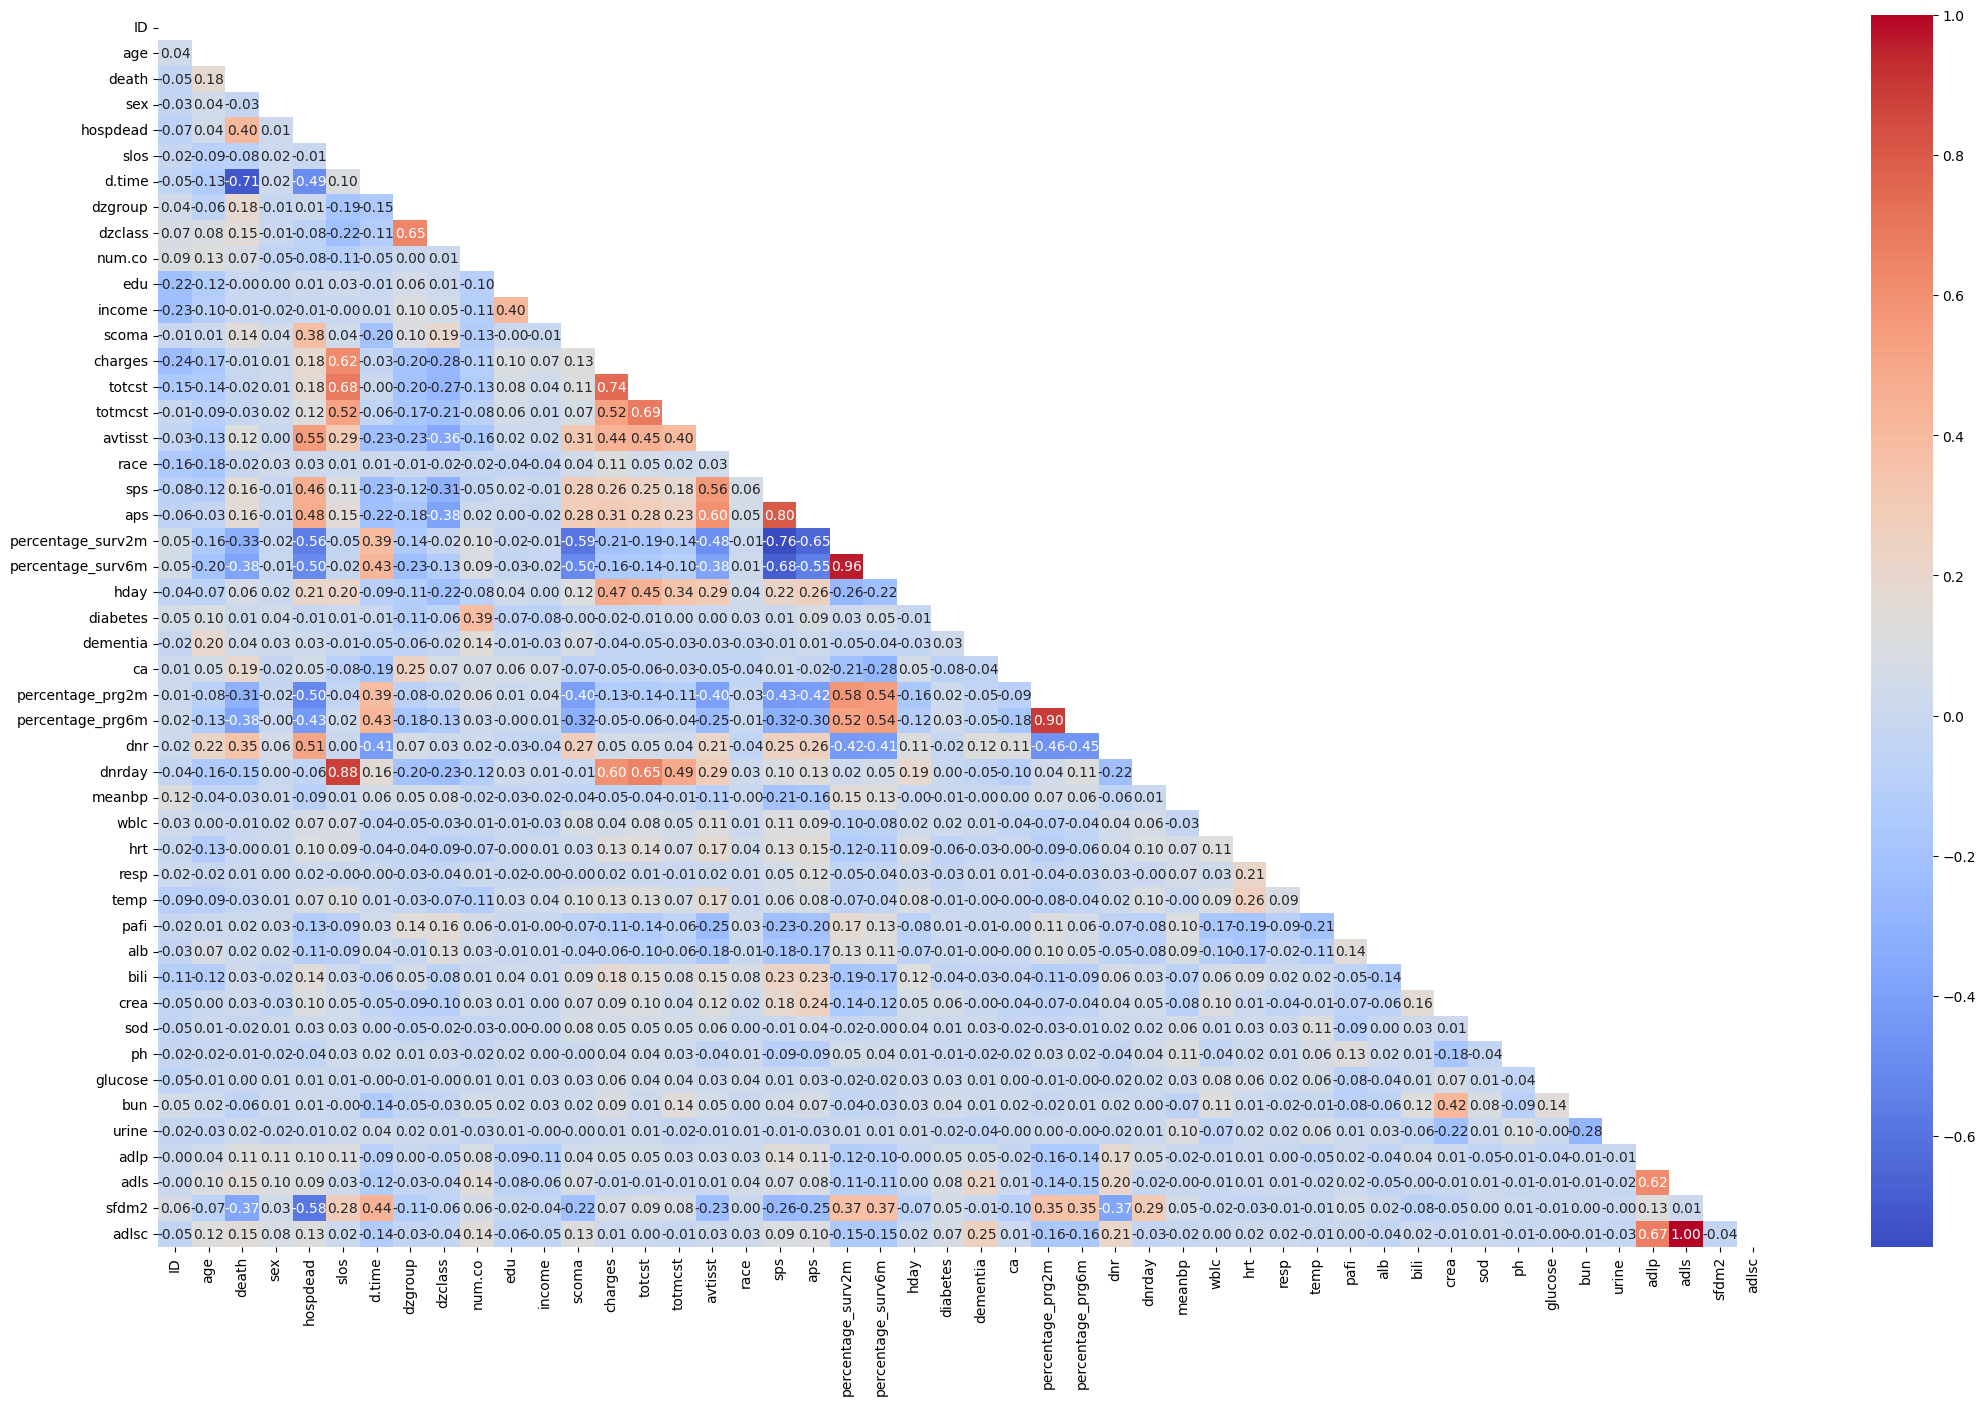

In [ ]:
corr_matrix = df_corr.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(26, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

**Strongest correlations (seem to be predictable):**

adlsc - adls - **1** Imputed Activities of Daily Living Calibrated to Surrogate - Activities of Daily Living filled out by surrogate

surv6m - surv2m - **0.96** SUPPORT model 6-month survival estimate at day 3 - SUPPORT model 2-month survival estimate at day 3

totmcst - totcst - **0.95** Total micro cost - Total ratio of costs to charges

prg6m - prg2m - **0.9** Physician’s 6-month survival estimate - Physician’s 2-month survival estimate

dnrday - slos - **0.88** Day of DNR order  - Days from Study Entry to Discharge

totcst - charges - **0.87** Total ratio of costs to charges - Hospital charges

totmcst - charges - **0.81** Total micro cost - Hospital charges

aps - sps - **0.8** APACHE III day 3 physiology score - SUPPORT physiology score on day 3

totcst - slos - **0.77** Total ratio of costs to charges - Days from Study Entry to Discharge

totmsct - slos - **0.77** Total micro cost - Days from Study Entry to Discharge

dnrday - totcst - **0.73** Day of DNR order - Total ratio of costs to charges

dnrday - totmcst - **0.72** Day of DNR order - Total micro cost

bun - crea - **0.68** Blood urea nitrogen levels measured at day 3 - serum creatinine levels measured at day 3

adlsc - adlp - **0.67** Imputed Activities of Daily Living Calibrated to Surrogate - Index of Activities of Daily Living filled out by the patient

dzclass - dzgroup - **0.65** The patient's disease category - The patient's disease sub category

dnrday - charges - **0.62** Day of DNR order - Hospital charges

adls - adlp - **0.62** Activities of Daily Living filled out by surrogate - Index of Activities of Daily Living filled out by the patient

# D.6. Further Analysis

# 1.Patient Demographics

These are the research questions based on the patient demographic investigation:


*   Q1 : How does age influence survival?
*   Q2: How does gender influence survival rates?
*   Q3: How does physicological stability impact survival?
*   Q4: How do socioeconomic factors (income and education) affect patient survival?


Q1 : How does age influence survival?

In [ ]:
# Created 4 age groups within the dataset and add additional column for the 'age group'.

def categorize_age(age):
    if age < 30:
        return '18-30 years'
    elif age >= 30 and age <= 50:
        return '30-50 years'
    elif age >50 and age <= 70:
        return '50-70 years'
    else:
        return '70+ years'

# Create an additional column in the copy of the dataset
df_age = df
df_age['age_group'] = df['age'].apply(categorize_age)

In [ ]:
pip install plotly

In [ ]:
# Age distribution with tree map

import plotly.express as px

# Group by 'age_group' and count occurrences

age_group_data = df_age.groupby('age_group').size().reset_index(name='count')

# Create the Tree Map
fig = px.treemap(age_group_data,
                 path=['age_group'],
                 values='count',
                 title='Age Distribution Among All Patients')

fig.show()

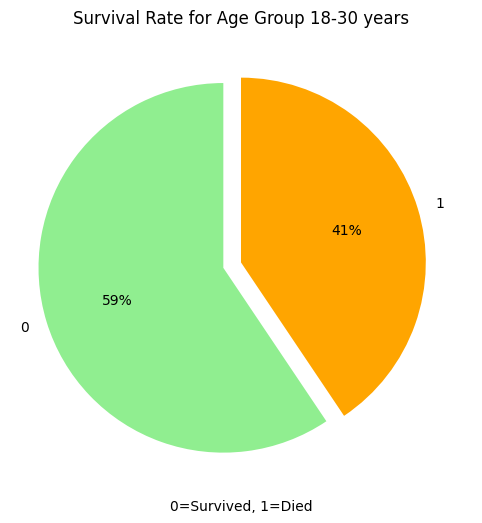

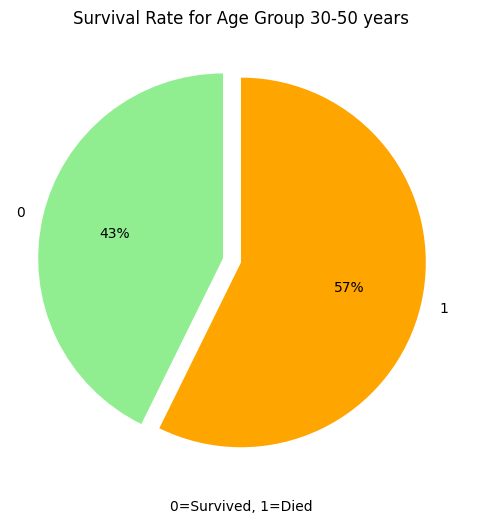

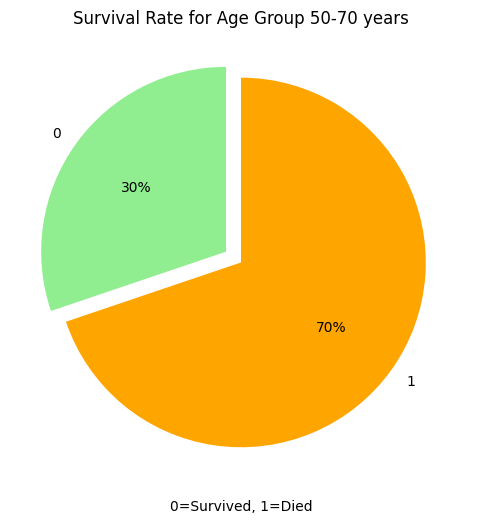

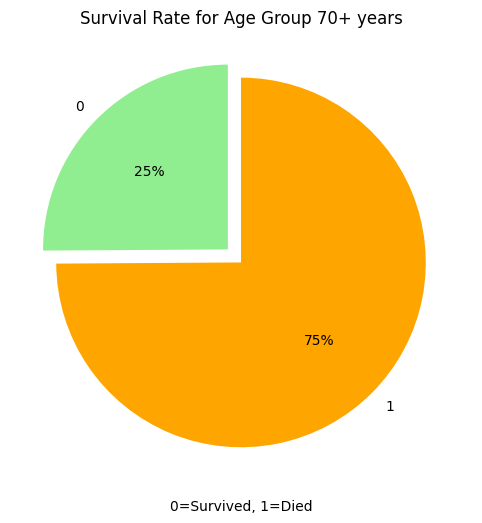

In [ ]:
# Survival rate in each age group

# Group the data
grouped_data2 = df_age.groupby(['death', 'age_group']).size().unstack(fill_value=0)

# Plot the pie chart
age_group = ['18-30 years', '30-50 years', '50-70 years', '70+ years']



for i in age_group:
    age_data = grouped_data2[i]

    age_data.plot(
        kind='pie',
        colors=['lightgreen', 'orange'],
        figsize=(8, 6),
        autopct='%1.0f%%',
        explode=(0.1, 0),
        startangle=90
    )
    plt.title(f"Survival Rate for Age Group {i}")
    plt.ylabel("")
    plt.xlabel("0=Survived, 1=Died")
    plt.show()


Q2: How does gender influence survival rates?

Text(0.5, 1.0, 'Gender Distribution')

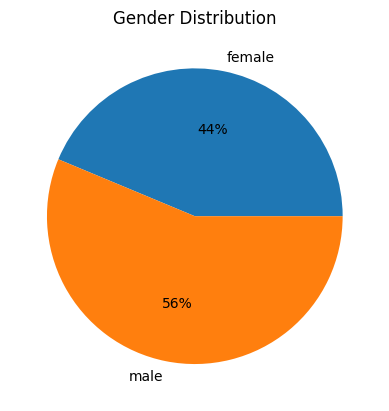

In [ ]:
# Gender distribution among all patients
df.groupby(['sex']).size().plot(kind='pie', autopct='%1.0f%%')
plt.title('Gender Distribution')

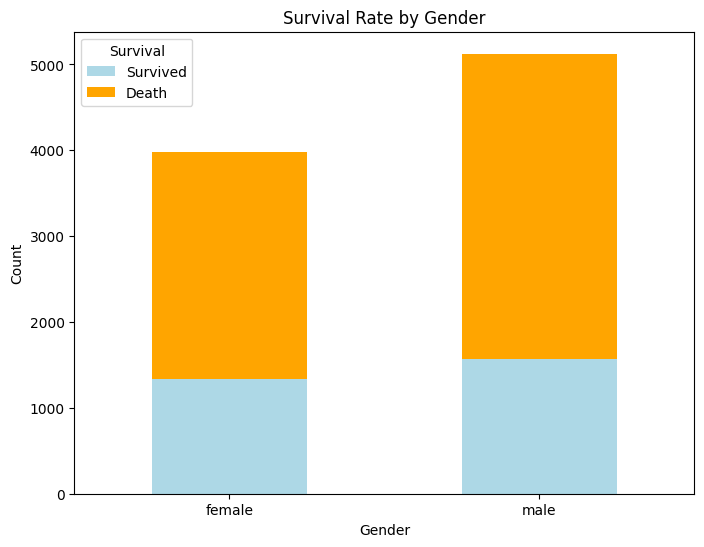

In [ ]:
# Survival rate by gender

# Group the data
grouped_data3 = df.groupby(['sex', 'death']).size().unstack(fill_value=0)

# Plot the bar chart
ax = grouped_data3.plot(
    kind='bar',
    stacked=True,
    color=['lightblue', 'orange'],
    figsize=(8, 6)
)


# Add labels and title
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Survived', 'Death'], title='Survival')
plt.show()

Q3: How does physicological stability impact survival?

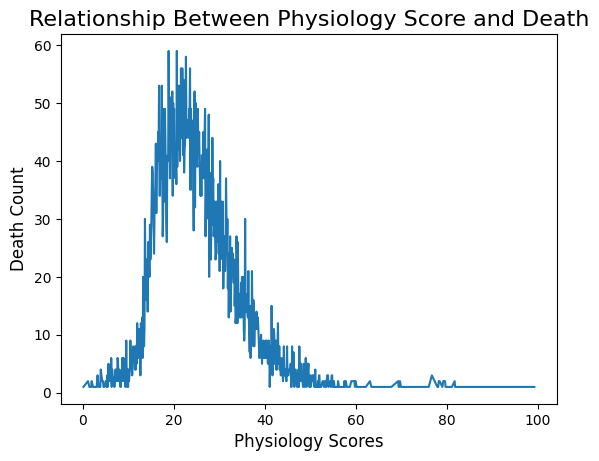

In [ ]:
line_sps = df.groupby(['sps'])['death'].count().plot()
plt.title('Relationship Between Physiology Score and Death', fontsize=16)
plt.xlabel('Physiology Scores', fontsize=12)
plt.ylabel('Death Count', fontsize=12)
plt.show()

Q4: How do socioeconomic factors (income and education) affect patient survival?

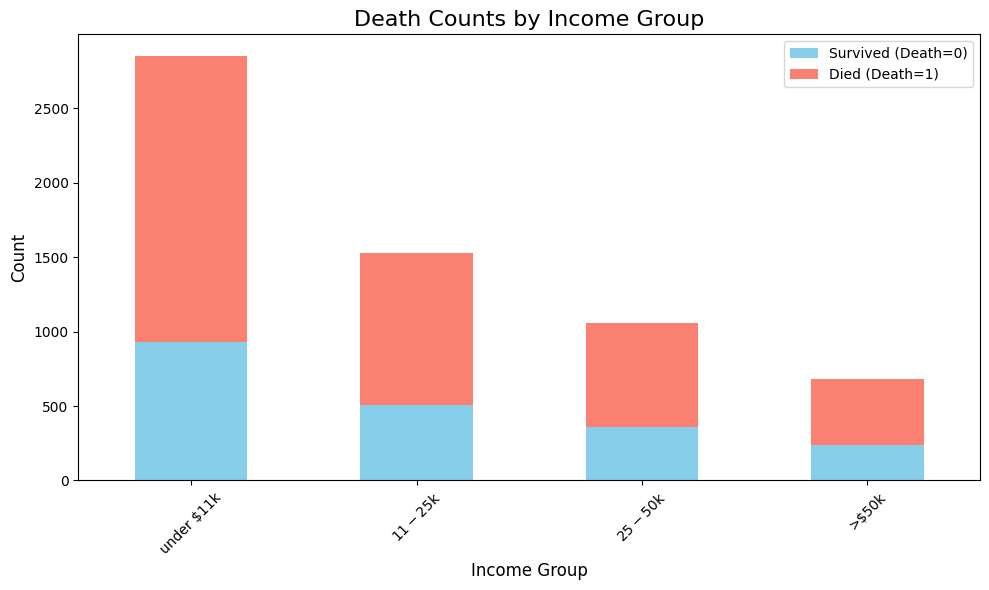

In [ ]:
# Income vs Death

grouped_data4 = df.groupby(['income', 'death']).size().unstack(fill_value=0)

# Change the order of income outputs
desired_order = ['under $11k', '$11-$25k', '$25-$50k', '>$50k']

grouped_data4 = grouped_data4.reindex(desired_order)

#Plot the bar chart
grouped_data4.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'salmon']
)

# Adding title and labels
plt.title('Death Counts by Income Group', fontsize=16)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['Survived (Death=0)', 'Died (Death=1)'], fontsize=10)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

Text(0.5, 1.0, 'Education Distribution Among All Patients')

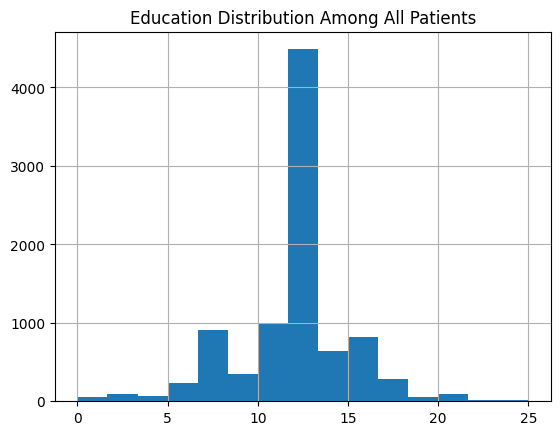

In [ ]:
# Education distribution
df.hist(column = 'edu', bins = 15)
plt.title('Education Distribution Among All Patients')

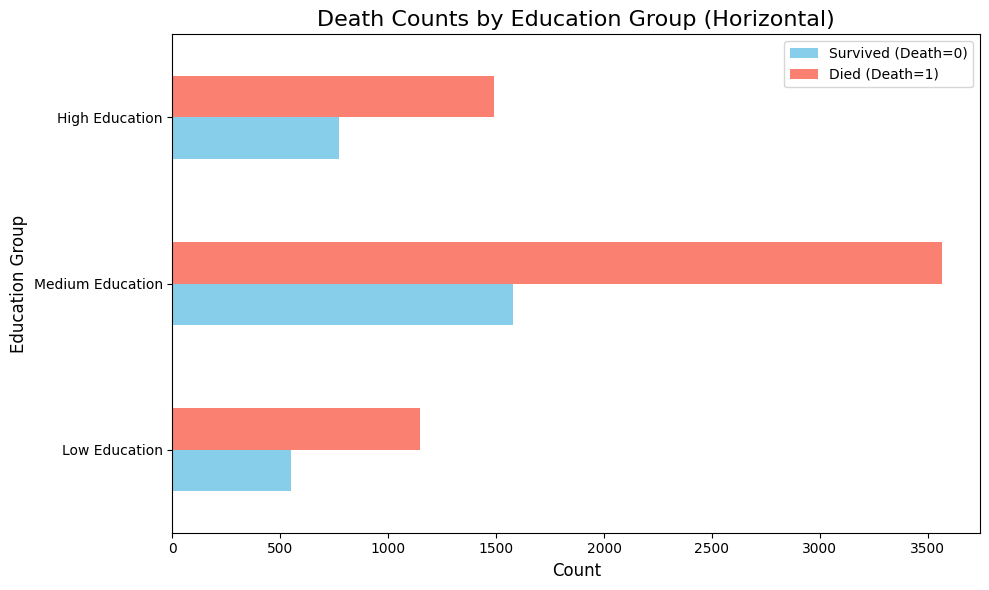

In [ ]:
# Creating education group based on the education year column

df_edu = df
df_edu['education_group'] = df['edu'].apply(lambda x: 'Low Education' if x <= 9
                                          else 'Medium Education' if x <= 12
                                          else 'High Education')

# Group the data by education and death number

grouped_data5 = df_edu.groupby(['education_group', 'death']).size().unstack(fill_value=0)

desired_order2 = ['Low Education', 'Medium Education', 'High Education']

grouped_data5 = grouped_data5.reindex(desired_order2)


#Plot the horixzantal bar chart

grouped_data5.plot(
    kind='barh',
    figsize=(10, 6),
    color=['skyblue', 'salmon'])

plt.title('Death Counts by Education Group (Horizontal)', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Group', fontsize=12)
plt.legend(labels=['Survived (Death=0)', 'Died (Death=1)'], fontsize=10)
plt.tight_layout()
plt.show()






# 2. Disease Related Trends


These are the research questions based on Disease Groups and Classes
- Q1: What is the disease most prevalent in the dataset?
- Q2: How are Comorbidities linked with different diseases? What are their most common patterns?
- Q3: Is there an association of the laboratory measurements with disease groups?
- Q4: How do diseases influence the hospital mortality, aps, length of stay, and time until death?

Q1: What is the disease most prevalent in the dataset?

<ipython-input-68-b543bdc7e04d>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




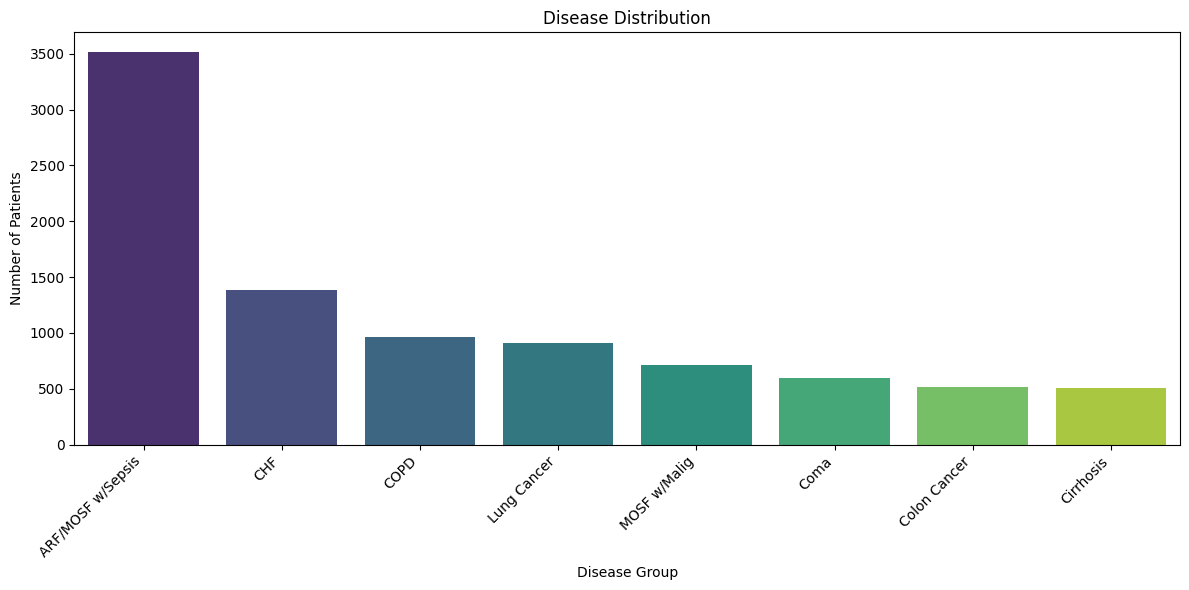

In [ ]:
# Q1

disease_distribution = df['dzgroup'].value_counts()

# Bar plot to visualize disease distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=disease_distribution.index, y=disease_distribution.values, palette="viridis")
plt.title("Disease Distribution")
plt.xlabel("Disease Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
# Save Figure
plt.savefig("disease_distribution.png")
plt.show()



Q2: How are Comorbidities linked with different diseases? What are their most common patterns?

<ipython-input-69-39b264c2a44e>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-69-39b264c2a44e>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-69-39b264c2a44e>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



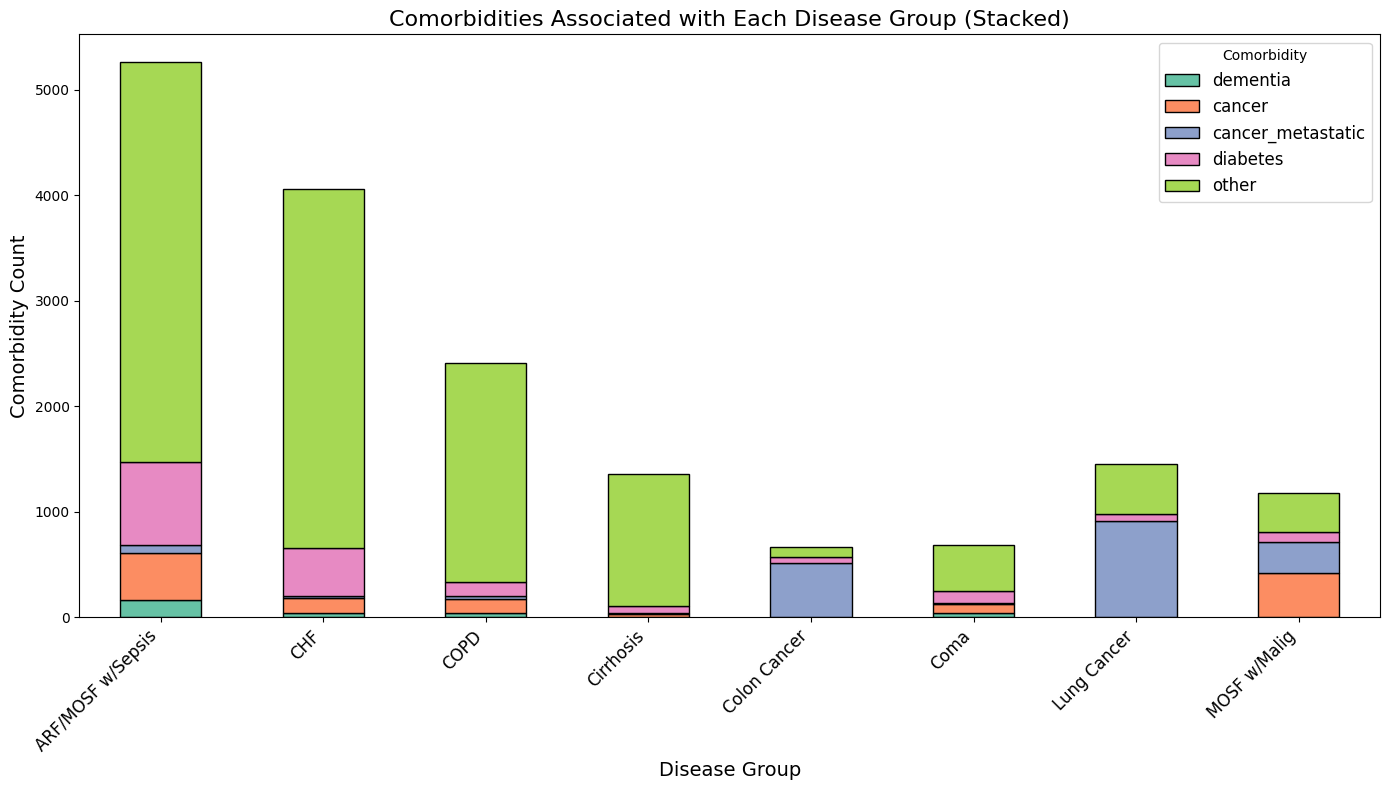

In [ ]:
# Q2

columns = ['dzgroup', 'dementia', 'ca', 'diabetes', 'num.co']
data_subset = df[columns]

# Classify cancer into 'cancer' and 'cancer metastatic'
data_subset['cancer_metastatic'] = (df['ca'] == 'metastatic').astype(int)
data_subset['cancer'] = (df['ca'] == 'yes').astype(int)

# Add 'other' comorbidities as anything beyond the tracked columns
data_subset['other'] = (data_subset['num.co'] - data_subset[['dementia', 'cancer', 'cancer_metastatic', 'diabetes']].sum(axis=1)).clip(lower=0)

# Aggregate comorbidity counts by disease group
comorbidity_counts = data_subset.groupby('dzgroup')[['dementia', 'cancer', 'cancer_metastatic', 'diabetes', 'other']].sum()


custom_colors = sns.color_palette("Set2", n_colors=5)

# Plot the stacked bar chart
comorbidity_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=custom_colors,
    edgecolor='black'
)

# Plot the stacked bar chart
plt.title("Comorbidities Associated with Each Disease Group (Stacked)", fontsize=16)
plt.xlabel("Disease Group", fontsize=14)
plt.ylabel("Comorbidity Count", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.legend(title="Comorbidity", fontsize=12)
plt.tight_layout()
#Save figure
plt.savefig("comorbidity_distribution.png")
plt.show()




Q3: Is there an association of the laboratory measurements with disease groups?

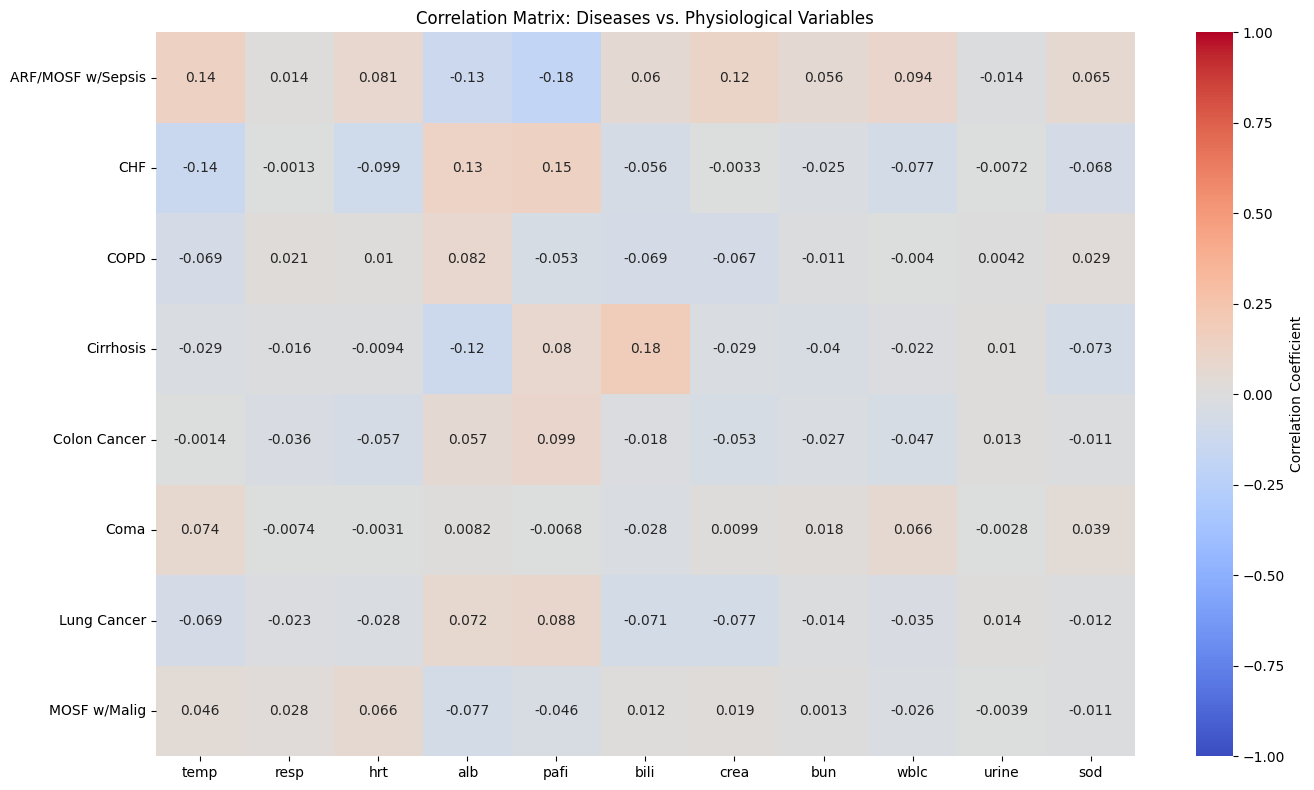

In [ ]:
# Q3

# Filter relevant columns and drop missing values
physiological_data = df[['dzgroup', 'temp', 'resp', 'hrt', 'alb', 'pafi', 'bili', 'crea', 'bun', 'wblc', 'urine', 'sod']].dropna()

# Encode diseases numerically
disease_encoded = pd.get_dummies(physiological_data['dzgroup'])

# Combine encoded diseases with physiological variables
data_combined = pd.concat([disease_encoded, physiological_data[['temp','resp', 'hrt', 'alb', 'pafi', 'bili', 'crea', 'bun', 'wblc', 'urine', 'sod']]], axis=1)

# Calculate the correlation matrix between diseases and physiological factors
correlation_matrix = data_combined.corr()

# Disease Vs Physiological Variables Only
disease_columns = disease_encoded.columns
physiological_columns = ['temp','resp', 'hrt', 'alb', 'pafi', 'bili', 'crea', 'bun', 'wblc', 'urine', 'sod']
relevant_correlation_matrix = correlation_matrix.loc[disease_columns, physiological_columns]

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(relevant_correlation_matrix, annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'}, vmin=-1,vmax=1)

# Customize the plot
plt.title("Correlation Matrix: Diseases vs. Physiological Variables")
plt.tight_layout()
# Save figure
plt.savefig("physiological_correlation.png")
plt.show()



Q4: How do diseases influence the hospital mortality, aps, length of stay, and time until death?

In [ ]:
# Q4

columns = ['dzgroup', 'hospdead', 'aps', 'slos', 'd.time']
data_filtered = df[columns]

<ipython-input-71-436a7b1a3b22>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




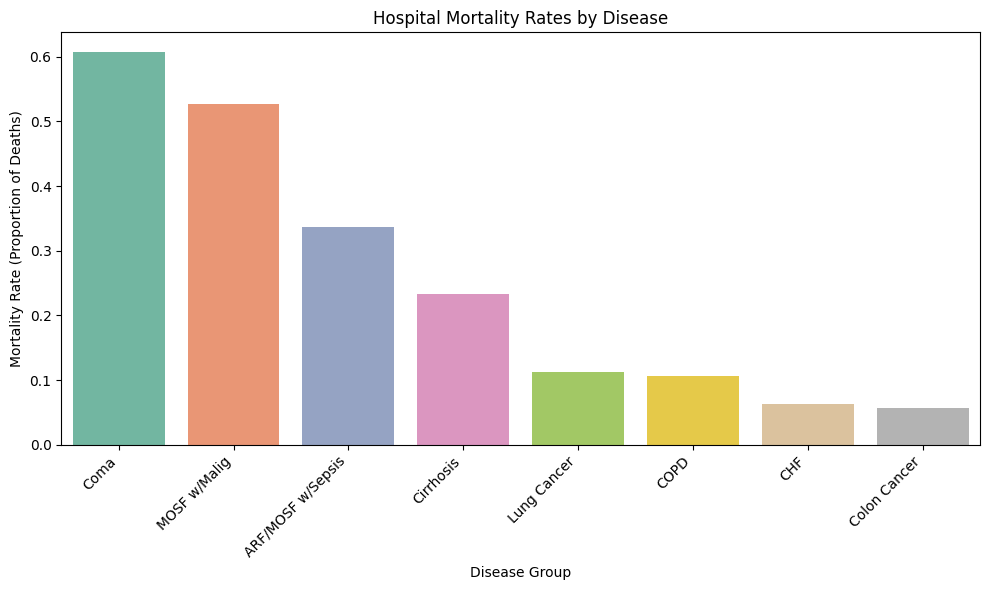

In [ ]:
# Mortality rates by disease
mortality_rates = data_filtered.groupby('dzgroup')['hospdead'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=mortality_rates.index, y=mortality_rates.values, palette="Set2")
plt.title("Hospital Mortality Rates by Disease")
plt.xlabel("Disease Group")
plt.ylabel("Mortality Rate (Proportion of Deaths)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
# Save figure
plt.savefig("mortality_rates.png")
plt.show()



<ipython-input-72-e80a09d31a1d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




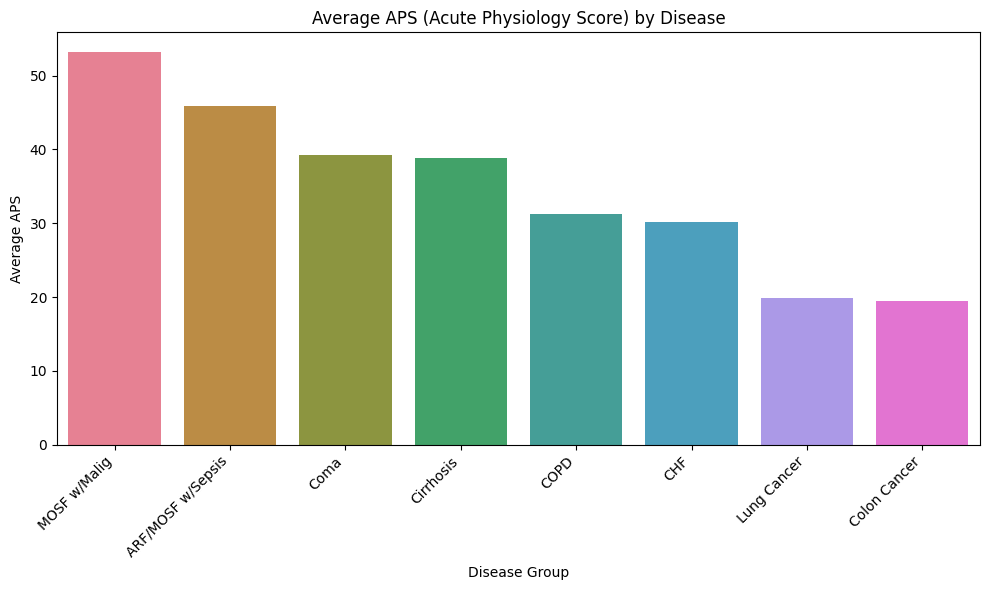

In [ ]:
# Physiological acuity (APS) by disease
aps_by_disease = data_filtered.groupby('dzgroup')['aps'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=aps_by_disease.index, y=aps_by_disease.values, palette="husl")
plt.title("Average APS (Acute Physiology Score) by Disease")
plt.xlabel("Disease Group")
plt.ylabel("Average APS")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
# Save figure
plt.savefig("aps_by_disease.png")
plt.show()



<ipython-input-73-b3c87c2fbabb>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




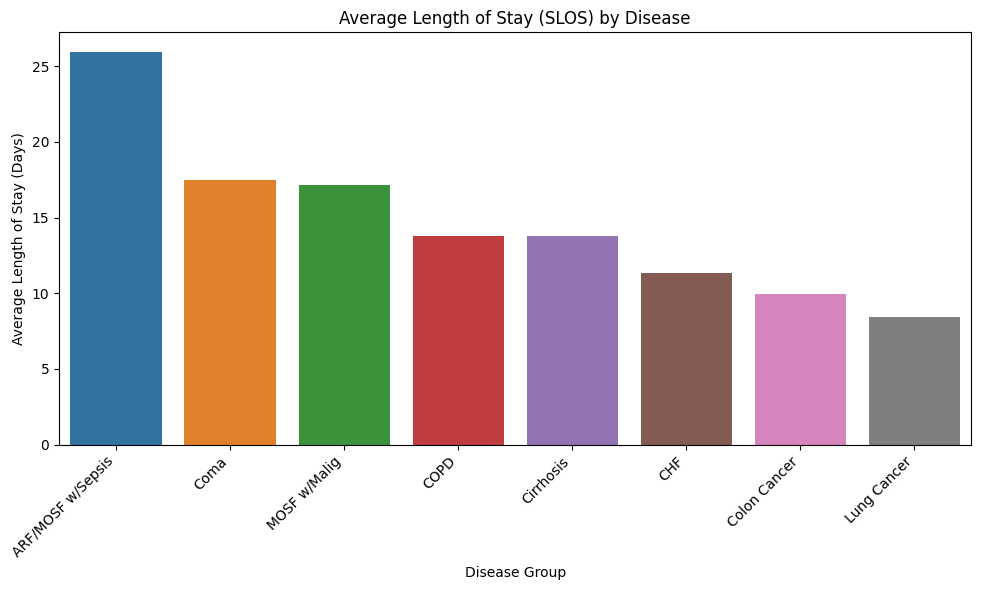

In [ ]:
# Length of stay (SLOS) by disease
slos_by_disease = data_filtered.groupby('dzgroup')['slos'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=slos_by_disease.index, y=slos_by_disease.values, palette="tab10")
plt.title("Average Length of Stay (SLOS) by Disease")
plt.xlabel("Disease Group")
plt.ylabel("Average Length of Stay (Days)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
# Save figure
plt.savefig("slos_by_disease.png")
plt.show()



# 3. Mortality/Survival Factors and Correlations

  Q1: How are physician's survival estimates commpared to predictions made by SUPPORT model in terms of actual deaths?

  Q2: What percentage of death were deaths in hospital?

  Q3: Is there a connection between the Patient Resuscitate order and mortality, race and lenght of stay in hospital?
  
  Q4: How is the number of comorbidities linked to mortality?


Q1: How are physician's survival estimates commpared to predictions made by SUPPORT model in terms of actual deaths?

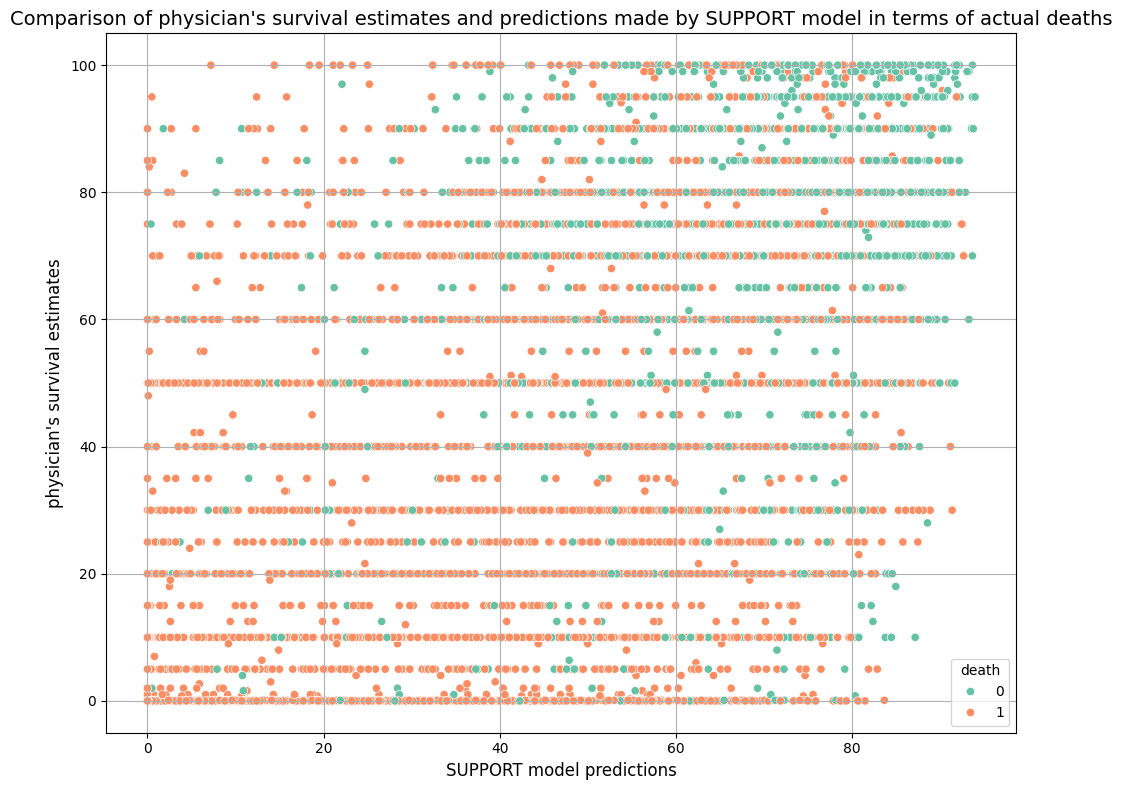

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="percentage_surv6m", y="percentage_prg6m", hue = "death", palette = "Set2", data=df)
plt.title("Comparison of physician's survival estimates and predictions made by SUPPORT model in terms of actual deaths", fontsize=14)
plt.xlabel("SUPPORT model predictions", fontsize=12)
plt.ylabel("physician's survival estimates", fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()


a. Visualise the curve of SUPPORT model predictions - left-skewed (negative
distribution) with high counts for zeroes.

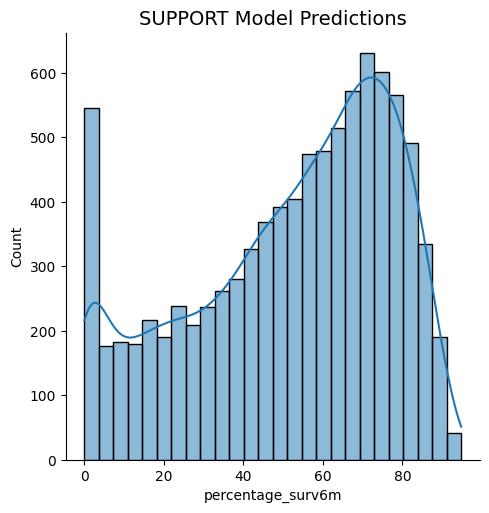

In [ ]:
sns.displot(df['percentage_surv6m'], kde=True)
plt.title("SUPPORT Model Predictions", fontsize=14)
plt.show()

b. Visualise the curve of SUPPORT model predictions - high counts for zeroes and 50%.

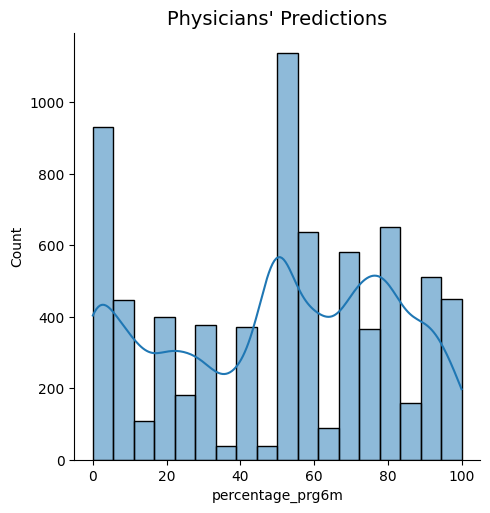

In [ ]:
sns.displot(df['percentage_prg6m'], kde=True)
plt.title("Physicians' Predictions", fontsize=14)
plt.show()

c. Compare physician's survival estimates and predictions made by SUPPORT model - big difference at 20% vs 80%, 50% and 60%.

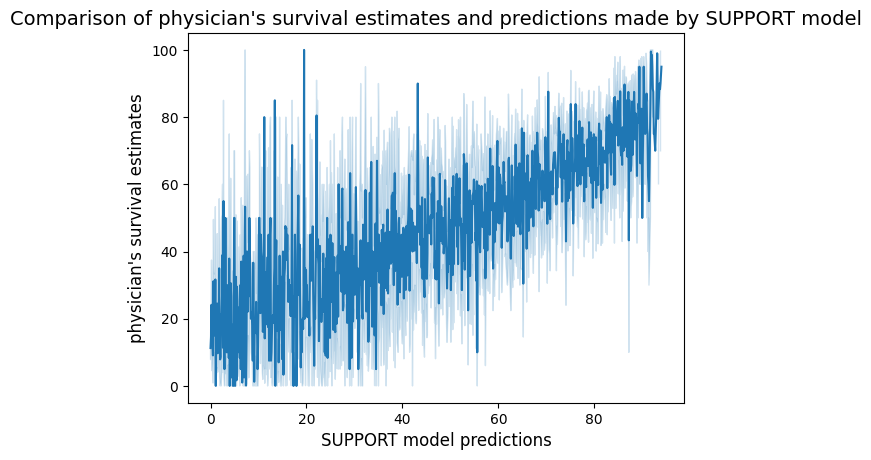

In [ ]:
#do we want to keep this?
sns.lineplot(x="percentage_surv6m", y="percentage_prg6m", data=df, dashes=False)
plt.title("Comparison of physician's survival estimates and predictions made by SUPPORT model", fontsize=14)
plt.xlabel("SUPPORT model predictions", fontsize=12)
plt.ylabel("physician's survival estimates", fontsize=12)
plt.show()

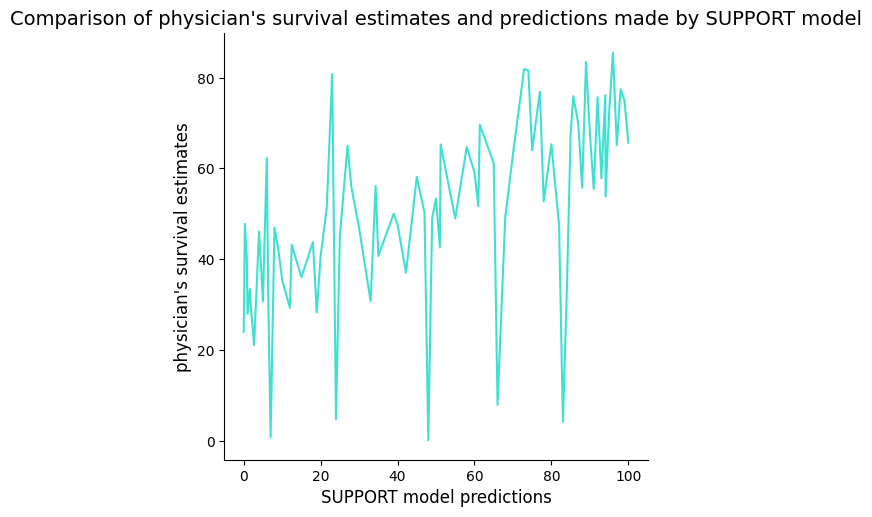

In [ ]:
sns.relplot(
    data=df, kind="line",
    x="percentage_prg6m", y="percentage_surv6m", color = "turquoise", errorbar=None,
)
plt.title("Comparison of physician's survival estimates and predictions made by SUPPORT model", fontsize=14)
plt.xlabel("SUPPORT model predictions", fontsize=12)
plt.ylabel("physician's survival estimates", fontsize=12)
plt.show()

Q2: What percentage of death were deaths in hospital?

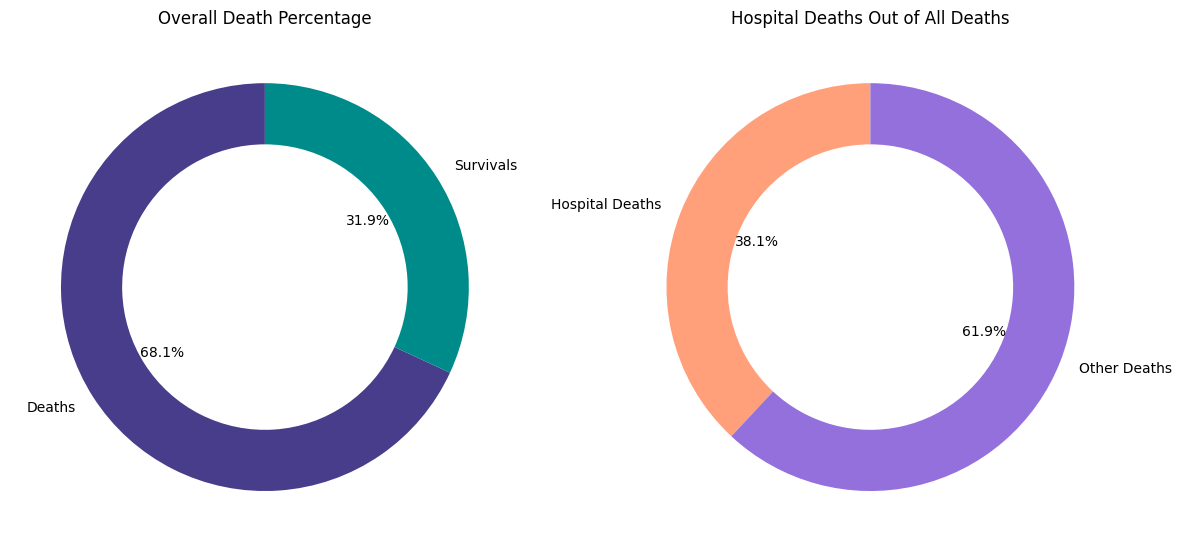

In [ ]:
# Calculate percentages
total_deaths = df['death'].sum()
hospital_deaths = df['hospdead'].sum()
death_percentage = total_deaths / len(df) * 100
hospital_death_percentage = hospital_deaths / total_deaths * 100

# Doughnut chart data
sizes_dataset = [death_percentage, 100 - death_percentage]  # Death and Survival percentages
labels_dataset = ['Deaths', 'Survivals']
dataset_colours = ["#483D8B", "#008B8B"]

sizes_hospital = [hospital_death_percentage, 100 - hospital_death_percentage]  # Hospital Death vs Non-hospital
labels_hospital = ['Hospital Deaths', 'Other Deaths']
hospital_colours = ["#FFA07A", "#9370DB"]

# Plotting the doughnut charts
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Outer doughnut for overall deaths
ax[0].pie(sizes_dataset, labels=labels_dataset, colors=dataset_colours, autopct='%1.1f%%', startangle=90,
          wedgeprops=dict(width=0.3))
ax[0].set_title("Overall Death Percentage")

# Inner doughnut for hospital deaths
ax[1].pie(sizes_hospital, labels=labels_hospital, colors=hospital_colours, autopct='%1.1f%%', startangle=90,
          wedgeprops=dict(width=0.3))
ax[1].set_title("Hospital Deaths Out of All Deaths")

plt.tight_layout()
plt.show()

Q3: Is there a connection between the Patient Resuscitate order and mortality, race and lenght of stay in hospital?

a. Patient resuscitate vs Mortality

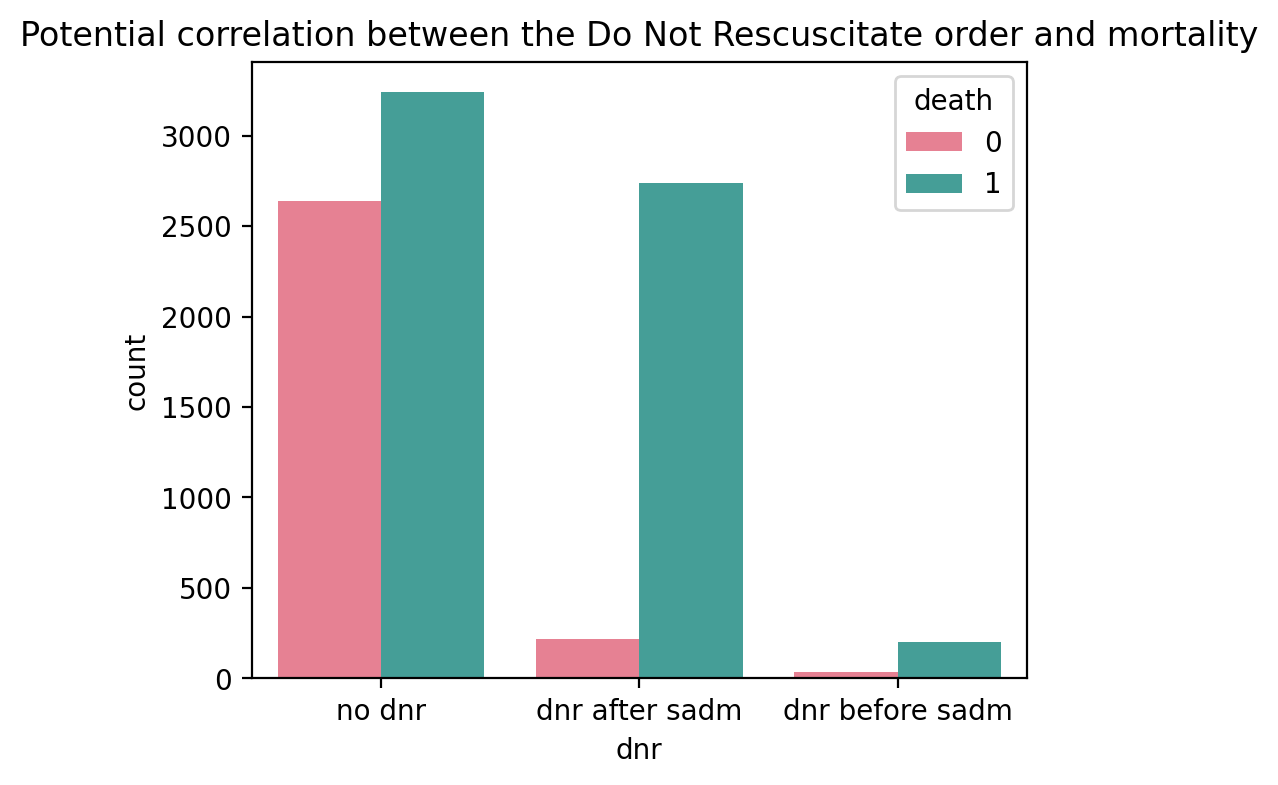

In [ ]:
plt.figure(figsize=(5,4), dpi=200)
sns.countplot(data=df, x='dnr', hue="death", palette="husl")
plt.title("Potential correlation between the Do Not Rescuscitate order and mortality", fontsize=12)
plt.show()

b. Patient Rescuscitate vs Race

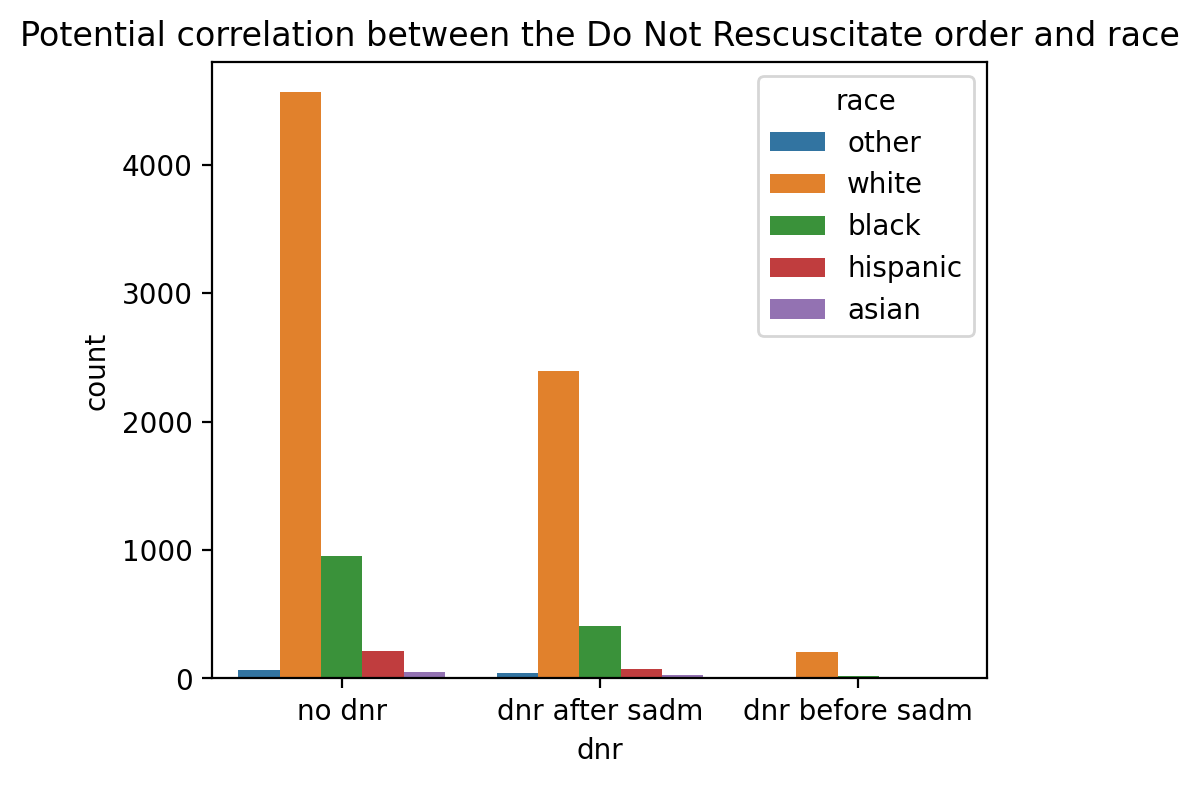

In [ ]:
plt.figure(figsize=(5,4), dpi=200)
sns.countplot(data=df, x='dnr', hue="race")
plt.title("Potential correlation between the Do Not Rescuscitate order and race", fontsize=12)
plt.show()

c. Create a column for total days of stay in hospital and compare total days and the day of the Do Not Resuscitate order in terms of deaths (correlation between total days and dnr day, but no correlation in deaths?).

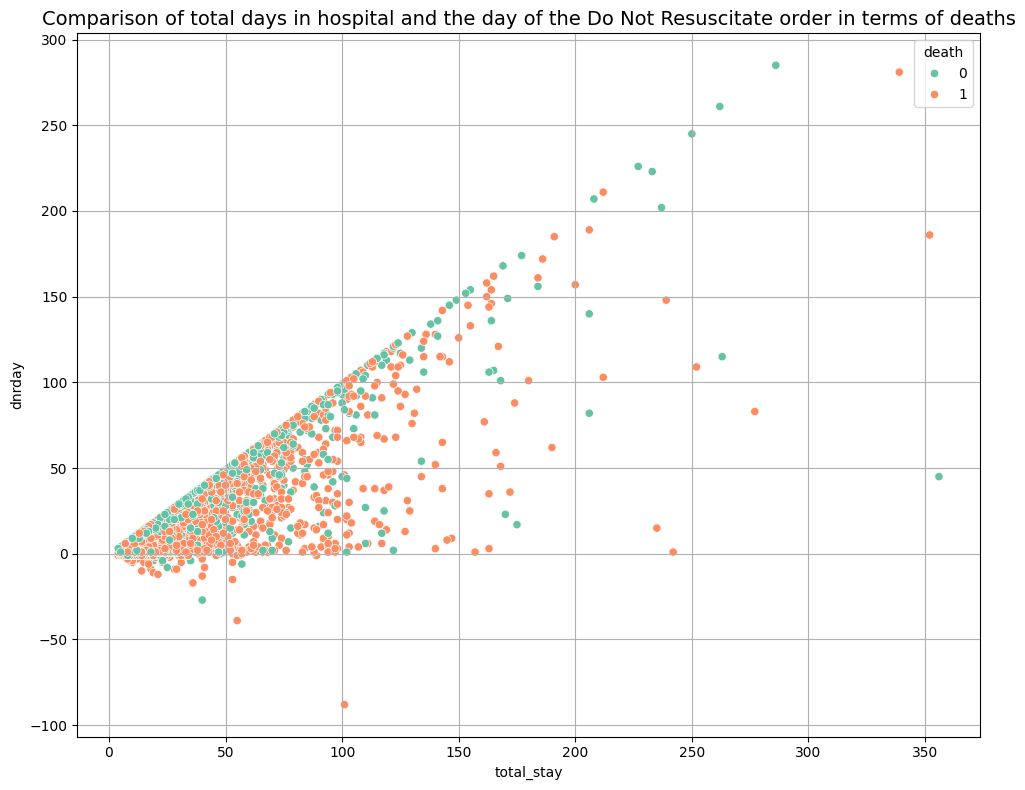

In [ ]:
df["total_stay"] = df["hday"] + df["slos"]

plt.figure(figsize=(10, 8))
sns.scatterplot(x="total_stay", y="dnrday", hue = "death", palette = "Set2", data=df)
plt.title("Comparison of total days in hospital and the day of the Do Not Resuscitate order in terms of deaths", fontsize=14)
plt.grid(True)
plt.tight_layout()

plt.show()

Q4: How is the number of comorbidities linked to mortality?

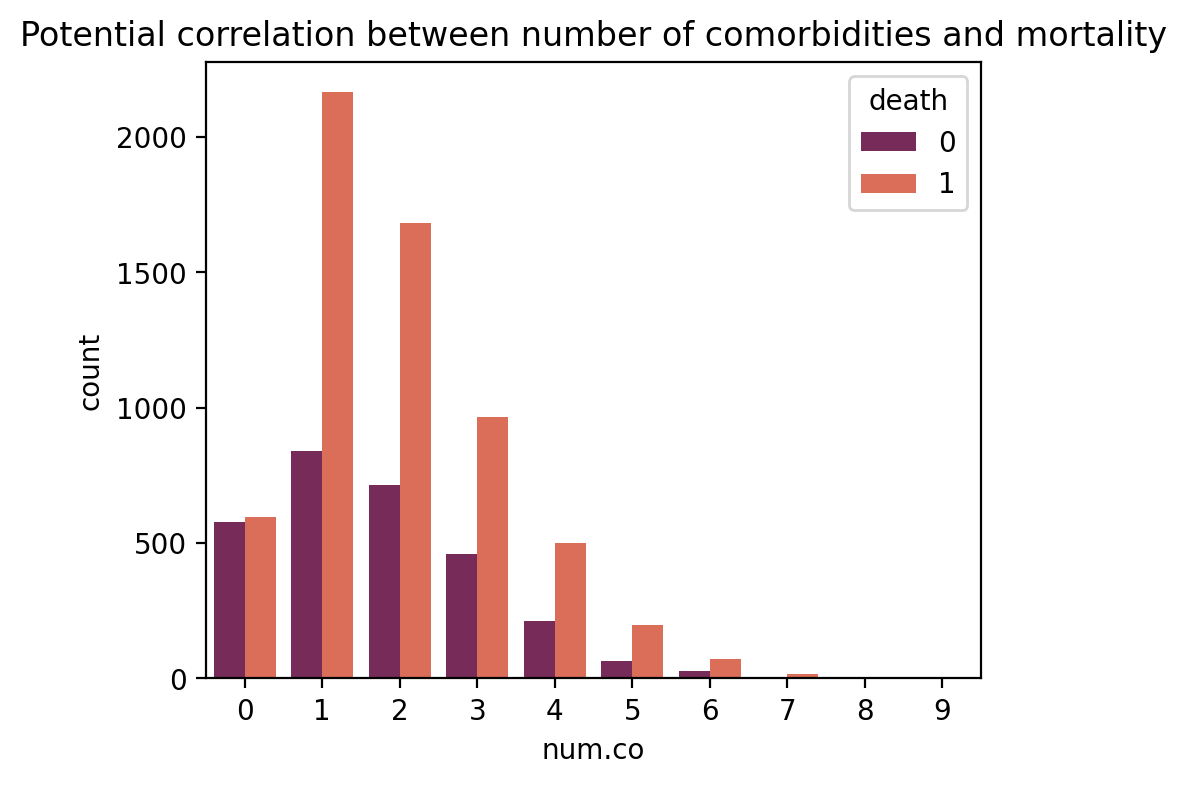

In [ ]:
plt.figure(figsize=(5,4), dpi=200)
sns.countplot(data=df, x='num.co', hue="death", palette="rocket")
plt.title("Potential correlation between number of comorbidities and mortality", fontsize=12)
plt.show()

# 4. Medical Expenditure

These are the research questions based on medical expenditure:

  Q1: According to the hospital charges which race was charged the most in terms of hospital expenses?

  Q2: Did the hospital expenses vary with the ratio of diabetes to the different races?

  Q3: Which age group segmented as race has been charged the most by the hospital in terms of horpital charges?
  
  Q4: Is there any link of the hospital charges and the patients who have diabetes and diagnosed cancer?



Q1: According to the hospital charges which race was charged the most in terms of hospital expenses?



In [ ]:
df1= df[['age','charges', 'd.time','dzgroup','dzclass', 'race', 'diabetes','ca','dementia']].copy()
df1

,age,charges,d.time,dzgroup,dzclass,race,diabetes,ca,dementia
0,62,9715.0,2029,Lung Cancer,Cancer,other,0,metastatic,0
1,60,34496.0,4,Cirrhosis,COPD/CHF/Cirrhosis,white,0,no,0
2,52,41094.0,47,Cirrhosis,COPD/CHF/Cirrhosis,white,0,no,0
3,42,3075.0,133,Lung Cancer,Cancer,white,0,metastatic,0
4,79,50127.0,2029,ARF/MOSF w/Sepsis,ARF/MOSF,white,0,no,0
...,...,...,...,...,...,...,...,...,...
9100,66,52870.0,350,ARF/MOSF w/Sepsis,ARF/MOSF,white,0,no,0
9101,55,35377.0,347,Coma,Coma,white,0,no,0
9102,70,46564.0,346,ARF/MOSF w/Sepsis,ARF/MOSF,white,0,no,0
9103,47,58439.0,7,MOSF w/Malig,ARF/MOSF,white,0,yes,0


In [ ]:
df1.dropna(axis=0, inplace=True)

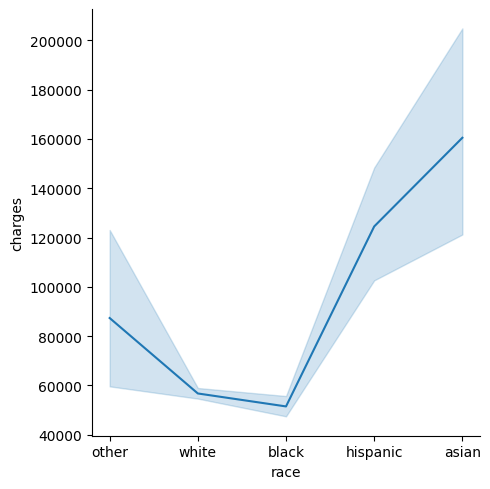

In [ ]:
sns.relplot(
    data=df1, kind="line",
    x="race", y="charges",
    facet_kws=dict(sharex=False),
)

Q2: Did the hospital expenses vary with the ratio of diabetes to the different races?

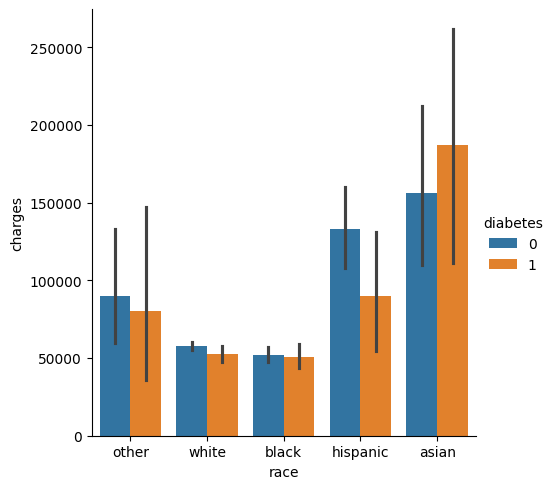

In [ ]:
sns.catplot(data=df1, kind="bar", x="race", y="charges", hue="diabetes")

Q3: Which age group segmented as race has been charged the most by the hospital in terms of horpital charges?

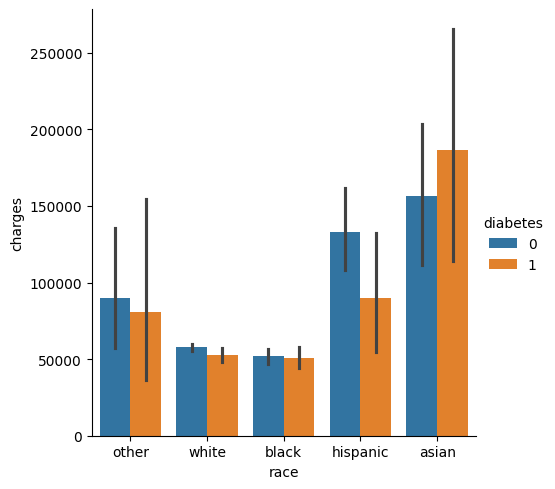

In [ ]:
def categorize_age(age):
    if age < 30:
        return '18-30 years'
    elif age >= 30 and age <= 50:
        return '30-50 years'
    elif age >50 and age <= 70:
        return '50-70 years'
    else:
        return '70+ years'

# Create an additional column in the copy of the dataset
df_age = df1
df_age['age_group'] = df['age'].apply(categorize_age)
sns.catplot(data=df1, kind="bar", x="race", y="charges", hue="diabetes")

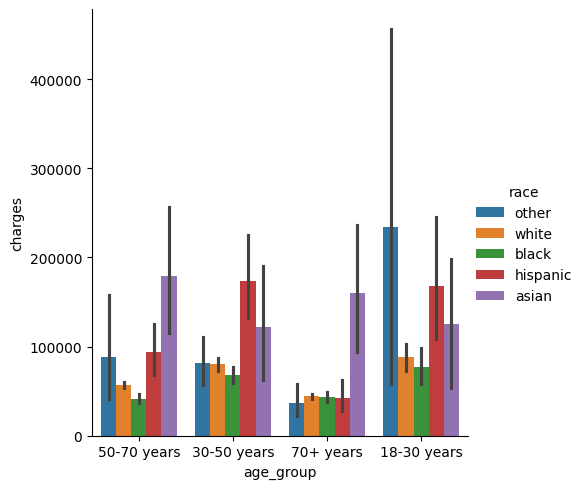

In [ ]:
sns.catplot(data=df_age, kind="bar", x="age_group", y="charges", hue="race")

Q4: Is there any link of the hospital charges and the patients who have diabetes and diagnosed cancer?

<Axes: xlabel='ca', ylabel='charges'>

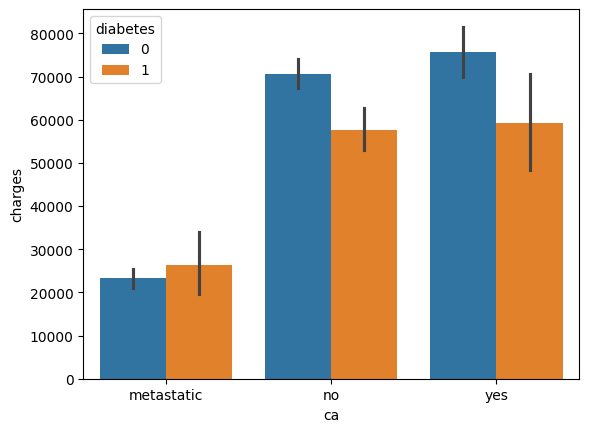

In [ ]:
sns.barplot(x='ca',y='charges',data=df1,hue='diabetes')

# E. Summary

## Conclusion

* Physician's 6 months survival estimates are slightly less precise and consistent compared to predictions made by SUPPORT model in terms of actual deaths.

* Predictions made by SUPPORT model give higher survival estimated than those made by physicians. Highest counts of estimates given by SUPPORT model are 70% and by physicians are 50%. Second highest is 0% for the both. The main differences are observed at 20% vs 80% and 50% and 60%, which could result from physicians' rounding percentage. Further information on how the estimates and predictions are given is necessary.

* Deaths in hospital make 38.1% of all deaths (68.1% mortality in general), which can potentially mean higher chances of survival if a patient is in hospital.

* Mortality is significantly higher for patients who gave the Do Not Resuscitate Order after first admission compared to those who had the Do Not Resuscitate Order before first admission or did not have it at all.

* There a connection between the day of Do Not Resuscitate order and length of stay in hospital but no correlation between them in the number of deaths.

* The number of comorbidities does not seem to be linked to mortality, with the highest mortality with 1 and 2 comorbidities and almost 50% chance of survival with zero comorbidities.

*   Among all age groups of patients, those aged 50-70 years have the highest proportion with %45, indicating they make up the largest segment in the dataset. This group is followed by patients aged 70+ with %33, who represent the second-largest proportion. Patients between 30-50 years come next with %19, showing a moderate contribution to the overall distribution. Finally, the 18-30 age group has the smallest proportion with %3. This pattern shows that middle-aged and older adults are the most affected or most frequently observed in the study population.

*   The investigation of the death rate across each age group suggests that the death rate among individuals aged 70+ is comparatively higher in the study. This is followed by the age groups 50-70 years, 30-50 years, and 18-30 years.

*  In the investigation of gender and mortality risk, it can be concluded that gender has no effect on the survival rate.

*  Socioeconomic factors such as patients' income and education level were investigated on the death rate. When examining income among patients, it is observed that the proportion of patients with low income is higher, and this proportion decreases inversely with income levels. On the other hand, based on the research on education level, a medium level of education is the most common among the patients; however, it has no influence on the death rate.

*   ARF/ MOSF w/ Sepsis is the most prevalent disease among the patients of the dataset with almost 3500 patients. Cirrohsis and Lung Cancer are the least common diseases with approximately 500 patients.

*   The analysis of total number of patients with each type of comorbidity within each disease group, reflects the overall burden of comorbidities across disease groups in the dataset showing how prevalent a comorbidity is within a specific disease group in absolute terms. Among the known comorbidities, diabetes takes precedence in diseases like ARF/ MOSF w/ Sepsis, CHF, Coma and Cirrohsis. While, Cancer (both metastatic and nonmetastatic) takes precedence in diseases like COPD, Lung Cancer, Colon Cancer and MOSF w/Malig. Dementia as a comorbidity is associated with diseases such as Coma, ARF/ MOSF w/ Sepsis, CHF and COPD.

*   The correlation between the diseases and the physiological variables helps uncover potential associations that can inform clinical understanding and decision-making. Bilirubin is strongly associated with ARF/ MOSF w/ Sepsis whereas temperature and respiration rate are strongly associated with Coma. Creatinnine and Blood Urea Nitrogen Levels have a strong negative correlation to Cirrohsis whereas Respiration Rate has a strong negative correlation to ARF/ MOSF w/ Sepsis as well.  

*   Analysis of hospital deaths, APS Score and Length of Stay was done. The disease group with most hospital deaths accounted for was Coma while the least were of Colon Cancer. Diseases with the highest APS Score like MOSF w/Malig and ARF/ MOSF w/ Sepsis, indicate conditions with the greatest physiological derangements.Longer length of stays are associated with ARF/ MOSF w/ Sepsis while shorter hospital length of stays are associated with Lung Cancer.

*   The hospital charges varied across the races where the dataset shows that the Asians were the ones where the hospital charged the most and white being the least charged.

*   This conclusion can be made when we look at the disease types as well. The hospital received the Asian patients with diabetes on which the expenditure was greatly more than the other races.

*   When we look at the age group of all the races, we can see that the Asian people of all age groups were charged the most out of all the other races. Where as the hospital has spent the greatest on other races aswwell with the age group of 18-30 years.  

*   When we look at the patients with cancer who also have diabetes, we can see that the hospital spent the most on the patients who were diagnosed with cancer and had diabetes as well. The patients who were metastatic were the ones with the least charged as compared to the patients which had or did not have the cancer.




## Recommendation

* 6 months survival estimates made by SUPPORT model are more precise and even. Further infromation on how the estimates and predictions are given by both the SUPPORT model and physicians is necessary.

* Staying in hospital can potentially mean higher chances.

* Further research is necessary on why mortality is significantly higher for patients who gave the Do Not Resuscitate Order after first admission compared to those who had the Do Not Resuscitate Order before first admission or did not have it at all.

*   Based on the age group reaserch, extra medical precautions might be required for the 70+ age group.
*   The effect of income level on survival rate can be further explored. For example, the impact of income on the ability to procure medications or use costly treatment methods can be investigated, and it can be examined whether patients with higher income have a positive effect on their survival rate.

*   Targeted preventions can be identified by observing specific comorbidities that may dominate certain disease groups since disease groups with high comorbidity burdens may indicate complex conditions requiring multidisciplinary care.
*   Diseases with higher average APS scores may require more intensive care resources like ventilators, dialysis, or close monitoring. Hospitals can use this information to plan staffing and equipment allocation.

*   The charges being charged on the base of race can not be racism but could be an indication that which race are more prone to be affected by the diseases and are weak against the disease types.

*   Hospitals and the National Health department should take the data into account and take the necessary steps to make sure that the diseases with which certain races are the weakest against, the medicines or the treatment should be made cheaper for them or research on the diseases and try to make a preventory medicine for the disease.

*   The ager group of 18-30 is the one paying for the hospital charges the most. The government should introduce a fitness program all over the country where the scientists recommend the best and affordable food with right amount of exercise for the indivieduals. This can bring the number of patients alot as most of the diseases are caused due to lack of awareness and unhealthy sleeping and eating habits.

## Challenges

*   Due to the lack of domain knowledge, some of the missing values couldn't be imputed.
*   Decision for keeping, transforming, or removing outliers is highly dependent on domain knowledge. Some of the outliers transformed or removed based on the insight from the data set. However, most of the outliers were left unchanged to prevent the loss of any critical information.


*   Distribution of uneven amount of patient sub group data(Ex: Different Disease Groups, Patient Demographics) makes it difficult and limits the conclusions we can draw out of them.







